In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

pd.options.display.max_columns = 150
pd.options.display.max_rows = 200

In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df_train = pd.read_csv('train.csv')
df_train.head(20)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    1          60       RL         65.0     8450   Pave   NaN      Reg   
1    2          20       RL         80.0     9600   Pave   NaN      Reg   
2    3          60       RL         68.0    11250   Pave   NaN      IR1   
3    4          70       RL         60.0     9550   Pave   NaN      IR1   
4    5          60       RL         84.0    14260   Pave   NaN      IR1   
5    6          50       RL         85.0    14115   Pave   NaN      IR1   
6    7          20       RL         75.0    10084   Pave   NaN      Reg   
7    8          60       RL          NaN    10382   Pave   NaN      IR1   
8    9          50       RM         51.0     6120   Pave   NaN      Reg   
9   10         190       RL         50.0     7420   Pave   NaN      Reg   
10  11          20       RL         70.0    11200   Pave   NaN      Reg   
11  12          60       RL         85.0    11924   Pave   NaN      IR1   
12  13          20       RL          NaN    12968   Pave   NaN      IR2   
13  14          20       RL         91.0    10652   Pave   NaN      IR1   
14  15          20       RL          NaN    10920   Pave   NaN      IR1   
15  16          45       RM         51.0     6120   Pave   NaN      Reg   
16  17          20       RL          NaN    11241   Pave   NaN      IR1   
17  18          90       RL         72.0    10791   Pave   NaN      Reg   
18  19          20       RL         66.0    13695   Pave   NaN      Reg   
19  20          20       RL         70.0     7560   Pave   NaN      Reg   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5          Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7          Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8          Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9          Lvl    AllPub    Corner       Gtl      BrkSide     Artery   
10         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
11         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
12         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
13         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
14         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
15         Lvl    AllPub    Corner       Gtl      BrkSide       Norm   
16         Lvl    AllPub   CulDSac       Gtl        NAmes       Norm   
17         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
18         Lvl    AllPub    Inside       Gtl      SawyerW       RRAe   
19         Lvl    AllPub    Inside       Gtl        NAmes       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0        Norm     1Fam     2Story            7            5       2003   
1        Norm     1Fam     1Story            6            8       1976   
2        Norm     1Fam     2Story            7            5       2001   
3        Norm     1Fam     2Story            7            5       1915   
4        Norm     1Fam     2Story            8            5       2000   
5        Norm     1Fam     1.5Fin            5            5       1993   
6        Norm     1Fam     1Story            8            5       2004   
7        Norm     1Fam     2Story            7            6       1973   
8        Norm     1Fam     1.5Fin            7            5       1931   
9      Artery   2fmCon     1.5Unf            5            6       1939   
10       Norm     1Fam     1Story            5            5       1965   
11       Norm     1Fam     

In [4]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df_train.describe(include = 'all')

Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1460.000000  1460.000000     1460  1201.000000    1460.000000   1460   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN     1151          NaN            NaN   1454   
mean     730.500000    56.897260      NaN    70.049958   10516.828082    NaN   
std      421.610009    42.300571      NaN    24.284752    9981.264932    NaN   
min        1.000000    20.000000      NaN    21.000000    1300.000000    NaN   
25%      365.750000    20.000000      NaN    59.000000    7553.500000    NaN   
50%      730.500000    50.000000      NaN    69.000000    9478.500000    NaN   
75%     1095.250000    70.000000      NaN    80.000000   11601.500000    NaN   
max     1460.000000   190.000000      NaN   313.000000  215245.000000    NaN   

       Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
count     91     1460        1460      1460      1460      1460         1460   
unique     2        4           4         2         5         3           25   
top     Grvl      Reg         Lvl    AllPub    Inside       Gtl        NAmes   
freq      50      925        1311      1459      1052      1382          225   
mean     NaN      NaN         NaN       NaN       NaN       NaN          NaN   
std      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
min      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
25%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
50%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
75%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
max      NaN      NaN         NaN       NaN       NaN       NaN          NaN   

       Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
count        1460       1460     1460       1460  1460.000000  1460.000000   
unique          9          8        5          8          NaN          NaN   
top          Norm       Norm     1Fam     1Story          NaN          NaN   
freq         1260       1445     1220        726          NaN          NaN   
mean          NaN        NaN      NaN        NaN     6.099315     5.575342   
std           NaN        NaN      NaN        NaN     1.382997     1.112799   
min           NaN        NaN      NaN        NaN     1.000000     1.000000   
25%           NaN        NaN      NaN        NaN     5.000000     5.000000   
50%           NaN        NaN      NaN        NaN     6.000000     5.000000   
75%           NaN        NaN      NaN        NaN     7.000000     6.000000   
max           NaN        NaN      NaN        NaN    10.000000     9.000000   

          YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
count   1460.000000   1460.000000      1460     1460        1460        1460   
unique          NaN           NaN         6        8          15          16   
top             NaN           NaN     Gable  CompShg     VinylSd     VinylSd   
freq            NaN           NaN      1141     1434         515         504   
mean    1971.267808   1984.865753       NaN      NaN         NaN         NaN   
std       30.202904     20.645407       NaN      NaN         NaN         NaN   
min     1872.000000   1950.000000       NaN      NaN         NaN         NaN   
25%     1954.000000   1967.000000       NaN      NaN         NaN         NaN   
50%     1973.000000   1994.000000       NaN      NaN         NaN         NaN   
75%     2000.000000   2004.000000       NaN      NaN         NaN         NaN   
max     2010.000000   2010.000000       NaN      NaN         NaN         NaN   

       MasVnrType   MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
count        1452  1452.000000      1460      1460       1460     1423   
unique          4          NaN         4         

In [6]:
# Target value is SalePrice

In [7]:
target = df_train.SalePrice

In [8]:
len(target)

1460

**The DataSet has 1460 entries**

<AxesSubplot:xlabel='SalePrice'>

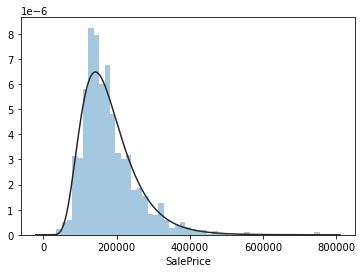

In [9]:
sns.distplot(target,kde = False,fit = st.lognorm)

**Target value should be transformed as log of Target**

In [10]:
Qualitative = [f for f in df_train.columns if df_train[f].dtype == 'object']
Categorical_Quant = [f for f in df_train.columns if (df_train[f].dtype == 'int64' and df_train[f].nunique() <=20)]
Float_Quant = [f for f in df_train.columns if df_train[f].dtype == 'float64']
Integer_Quant = [f for f in df_train.columns if df_train[f].dtype == 'int64' and df_train[f].nunique()>20]
Integer_Quant.remove('SalePrice')
Integer_Quant.remove('Id')
Quantitative = Categorical_Quant + Float_Quant + Integer_Quant

In [11]:
print(Qualitative)
print(Categorical_Quant)
print(Float_Quant)
print(Integer_Quant)
print (len(Quantitative) + len(Qualitative)  == 79)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MoSold', 'YrSold']
['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
['LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'Ga

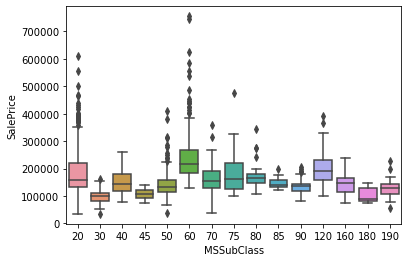

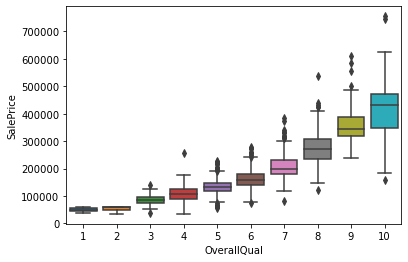

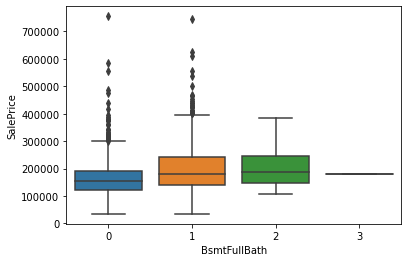

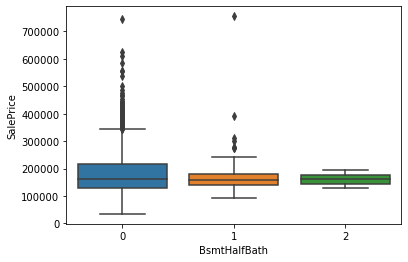

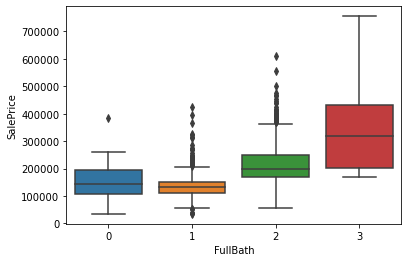

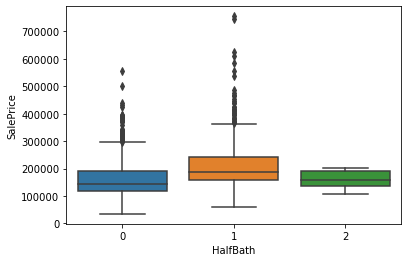

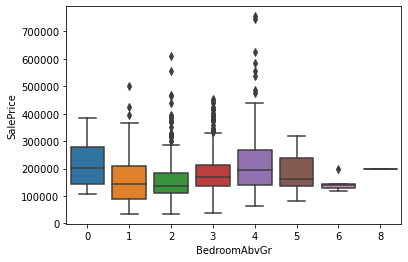

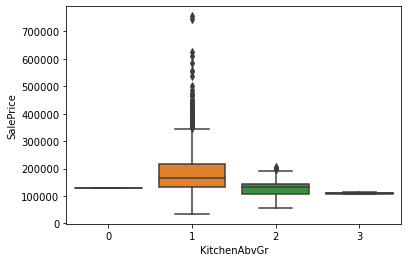

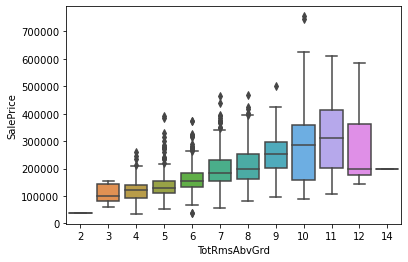

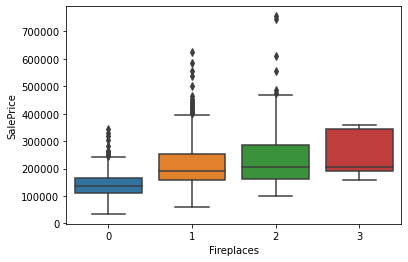

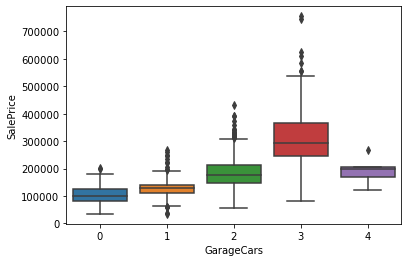

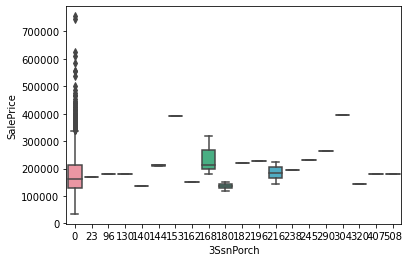

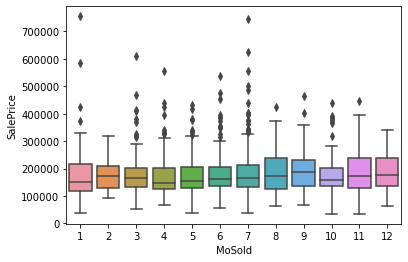

In [12]:
# Let us first see the distribution of Categorical_Quant Features
# Box Plot would be a good Visualisation

for feature in Categorical_Quant:
    plt.figure()
    sns.boxplot(x = feature,y='SalePrice', data = df_train)

**Many Parameters show high linear dependence. We will see more when we study co-relations**

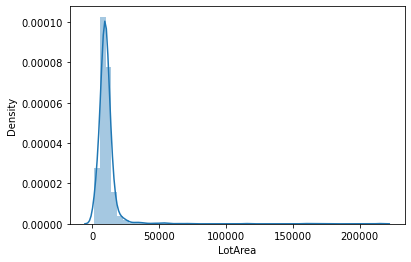

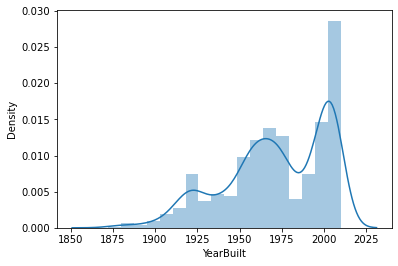

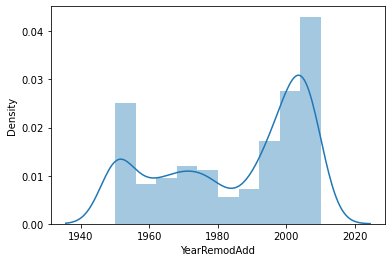

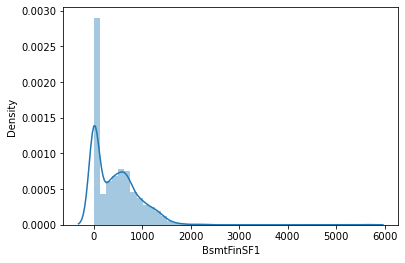

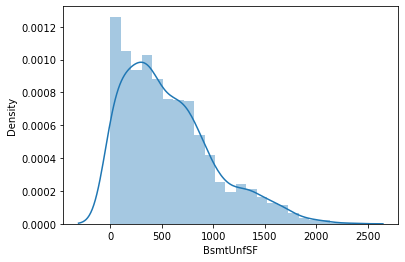

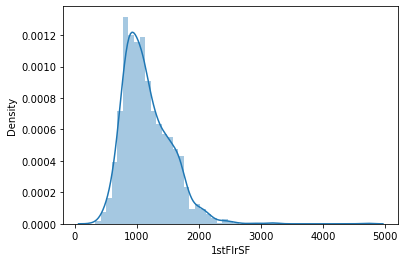

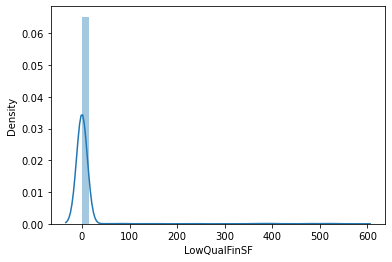

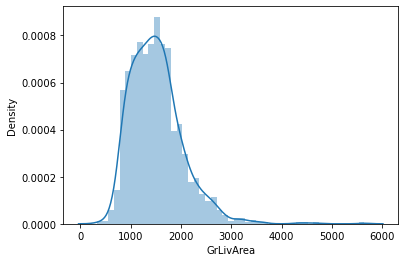

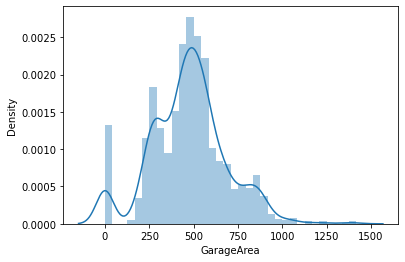

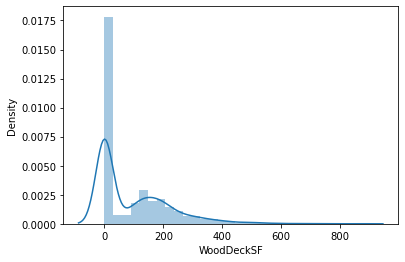

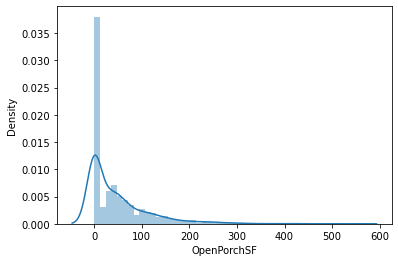

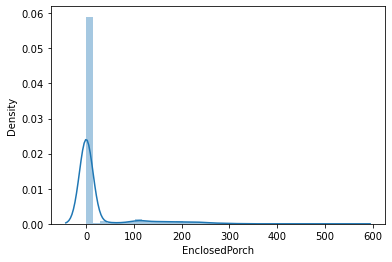

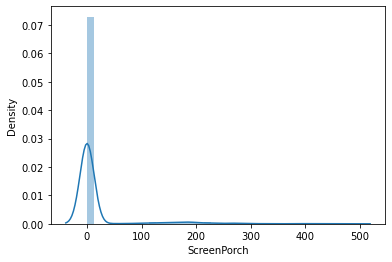

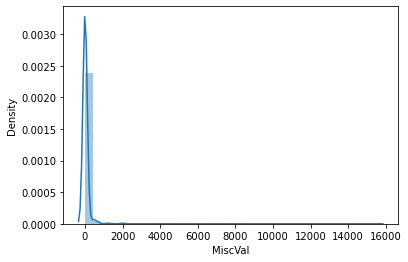

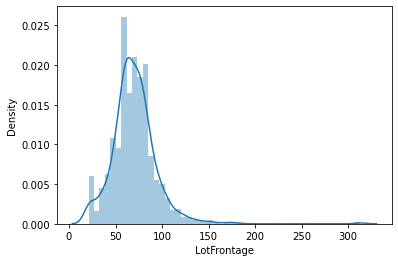

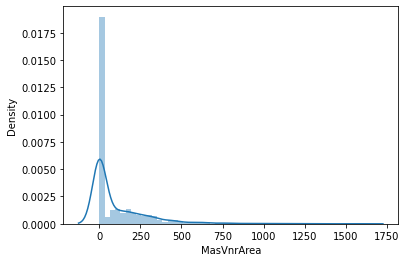

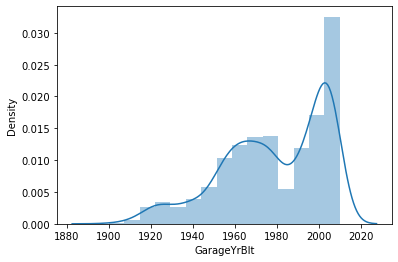

In [13]:
# looking at histograms of Integer and float Features
# Also plotting lognormal kde to see if log transformation is required

for i in Integer_Quant+Float_Quant:
    plt.figure()
    sns.distplot(df_train[i])

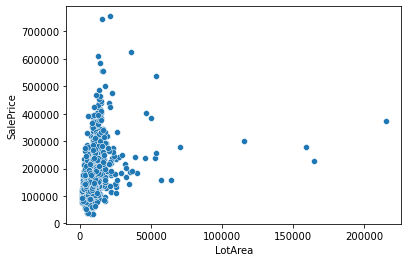

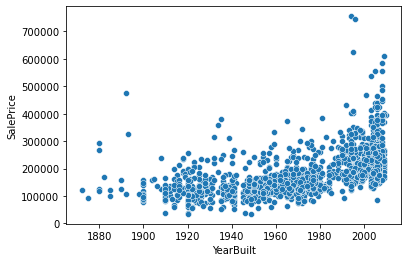

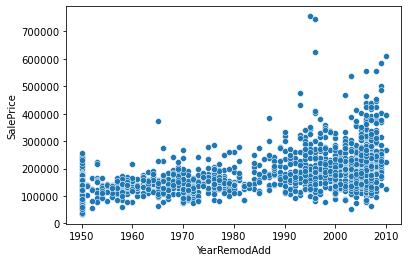

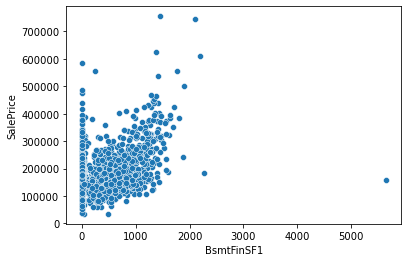

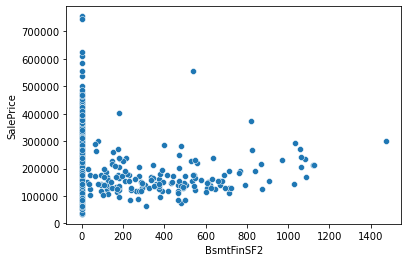

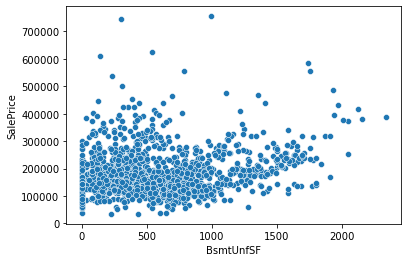

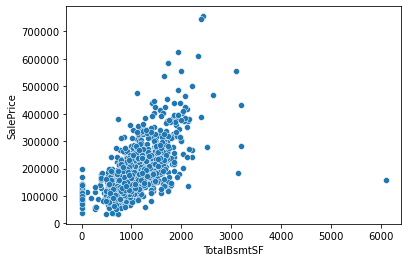

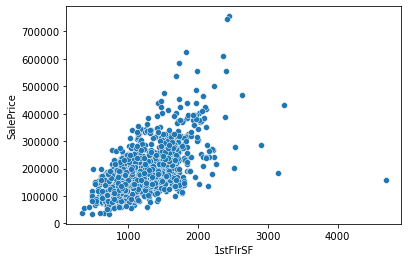

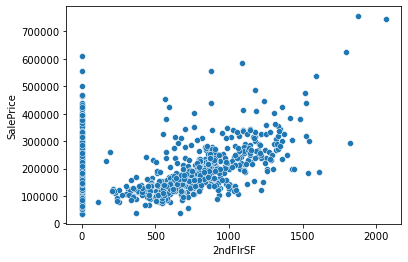

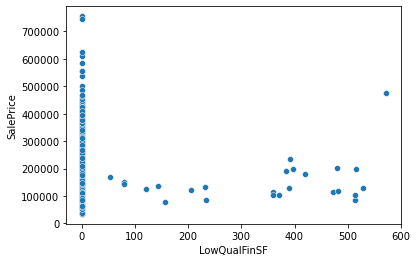

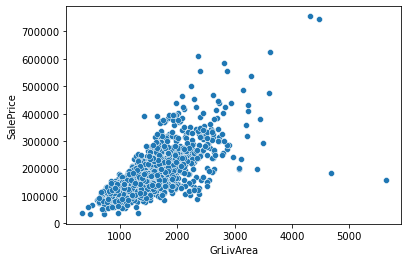

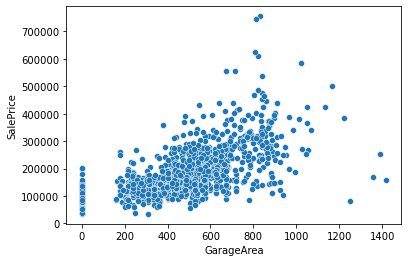

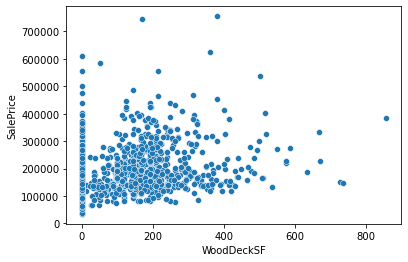

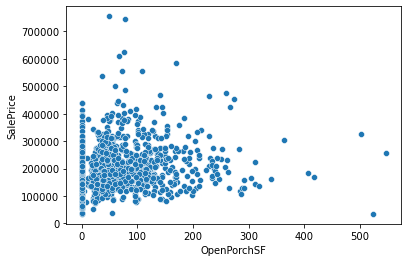

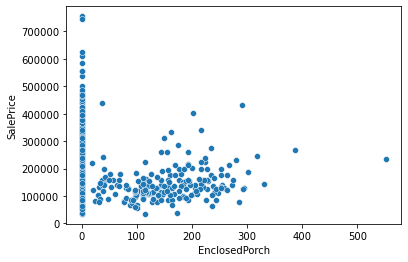

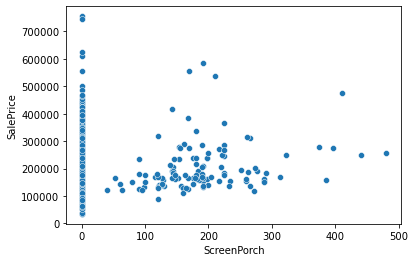

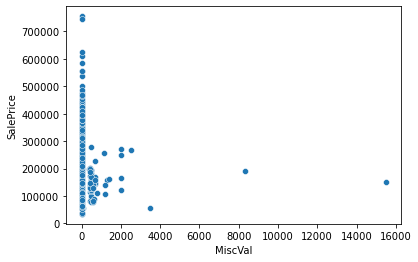

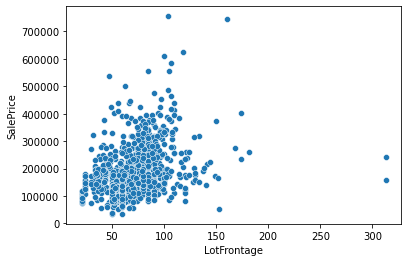

In [14]:
for i in Integer_Quant+Float_Quant:
    plt.figure()
    sns.scatterplot(x = i,y='SalePrice',data=df_train)

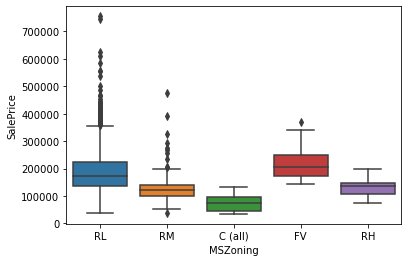

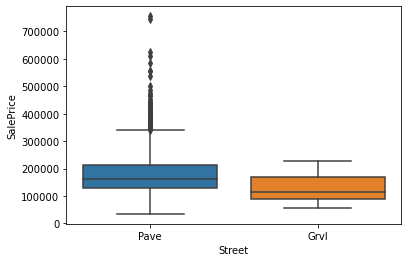

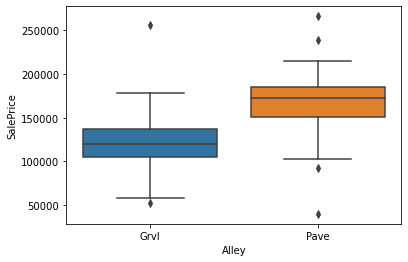

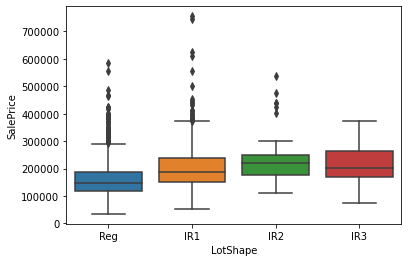

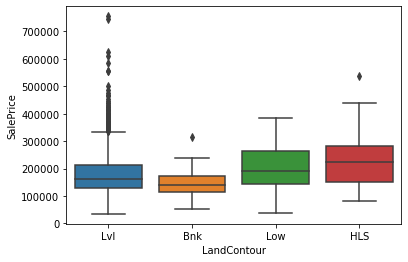

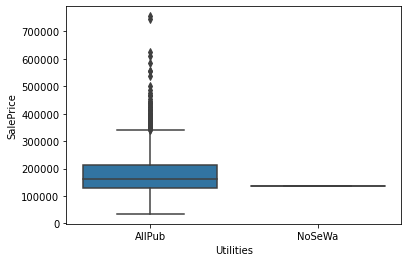

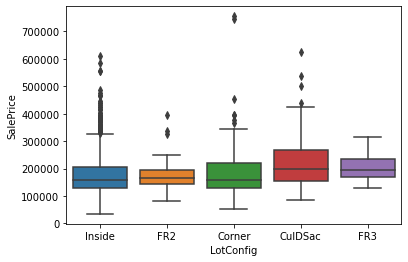

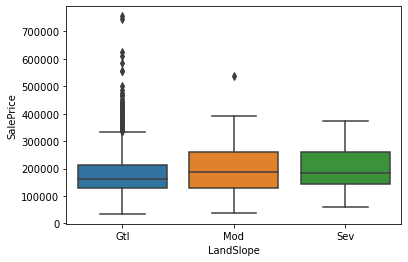

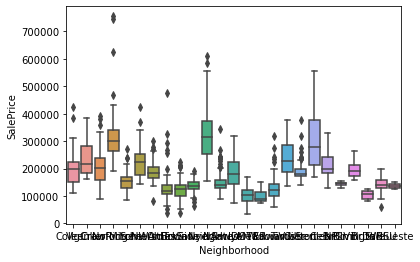

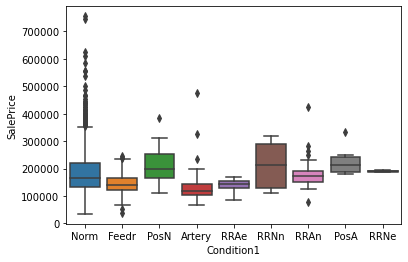

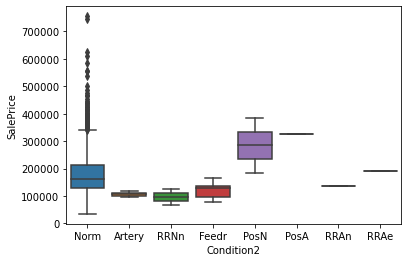

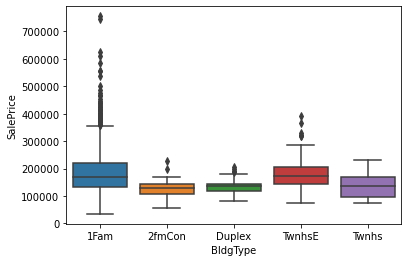

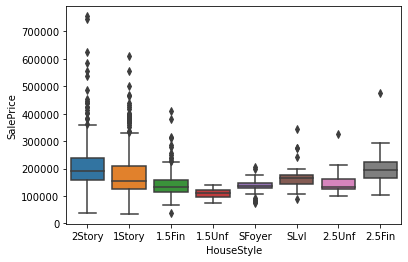

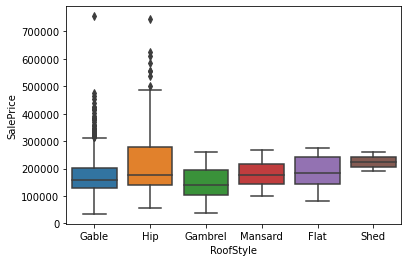

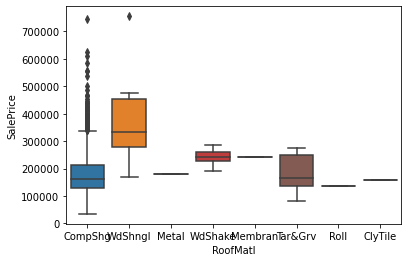

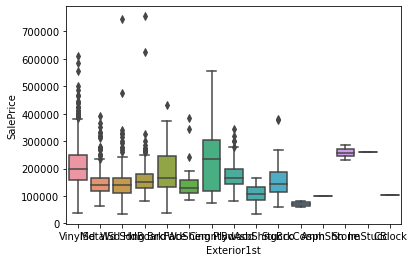

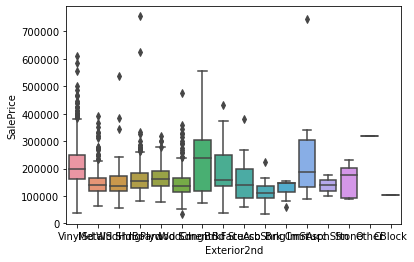

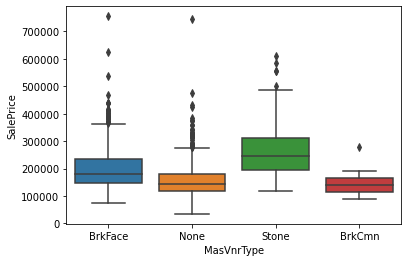

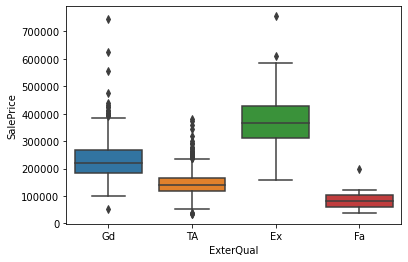

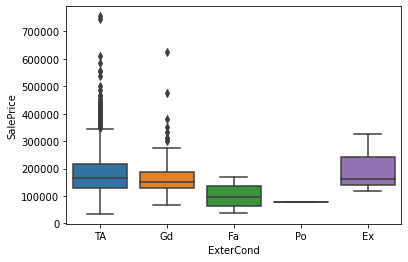

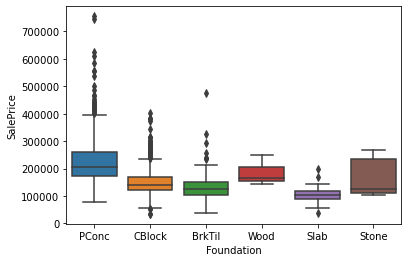

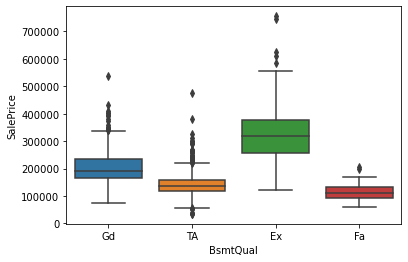

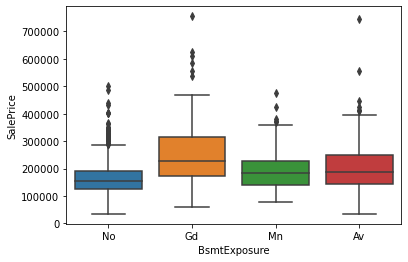

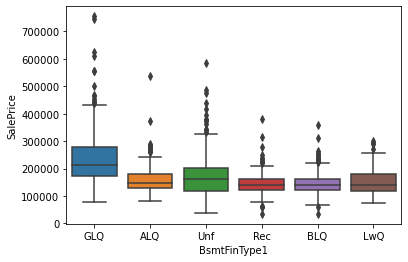

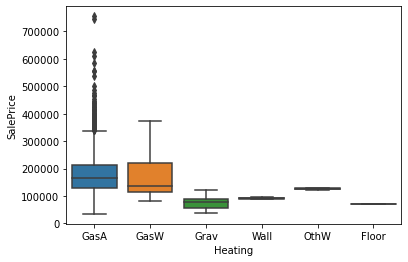

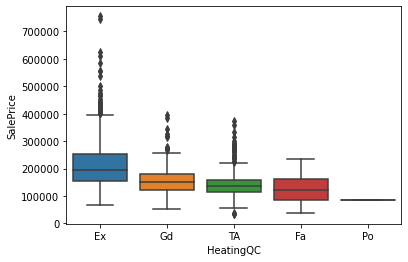

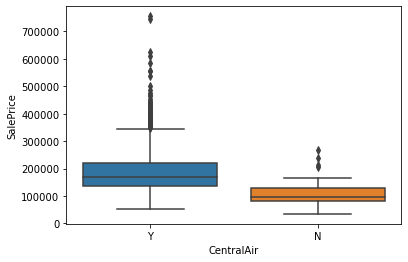

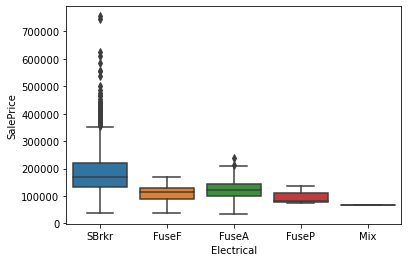

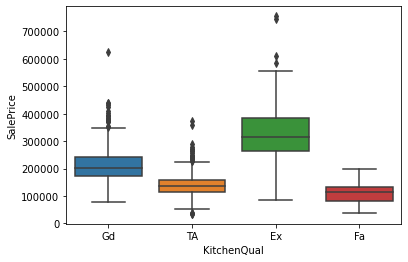

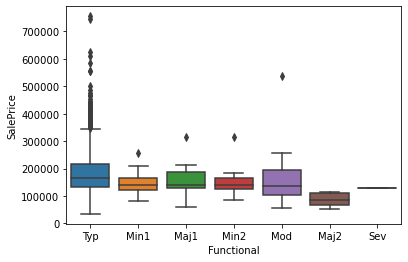

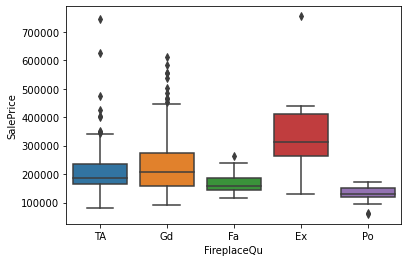

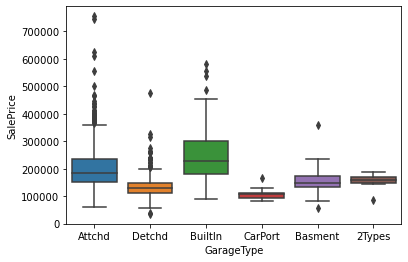

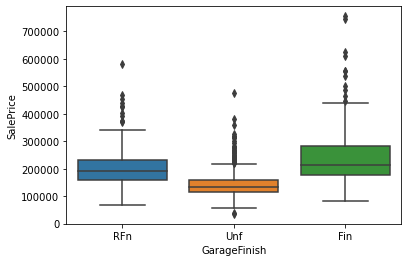

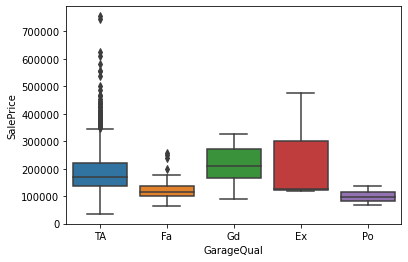

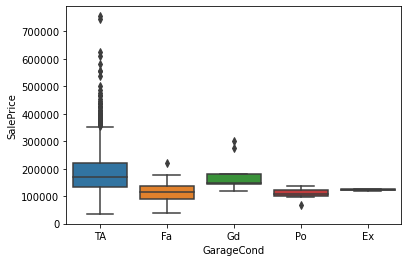

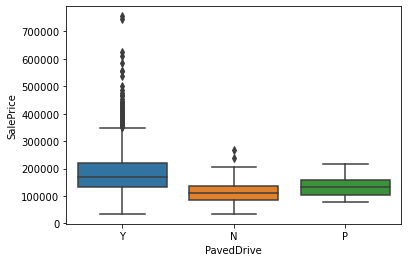

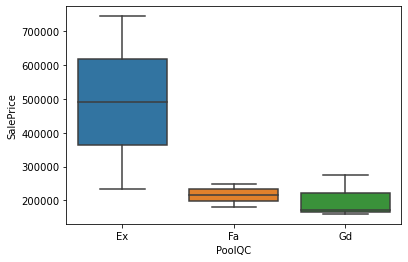

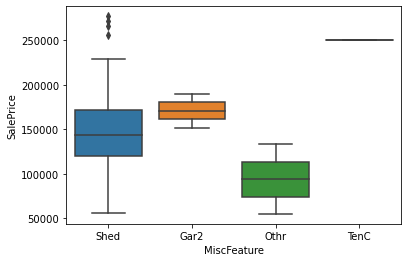

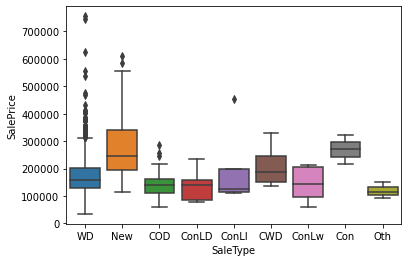

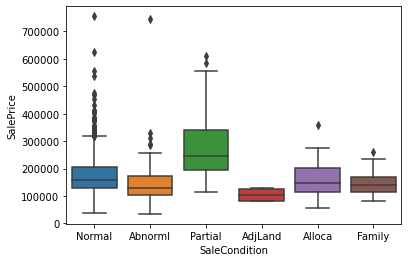

In [15]:
# Randomly plotting box plots for Qualitative

for feature in Qualitative:
    plt.figure()
    sns.boxplot(x = feature,y='SalePrice', data = df_train)

In [16]:
# Although there might be many trends in the Qualitative Features but they aren't visible as the groups are zumbled

In [17]:
# Dealing with Missing Values first then encoding qualitative features to identify trends

### Missing Values

In [18]:
# First step is to see which columns have missing values and how manny

In [19]:
Missing_df = df_train.isnull().sum()[df_train.isnull().sum()>0].sort_values(ascending = False)
Missing_lst = Missing_df.index
Missing_df

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

<AxesSubplot:>

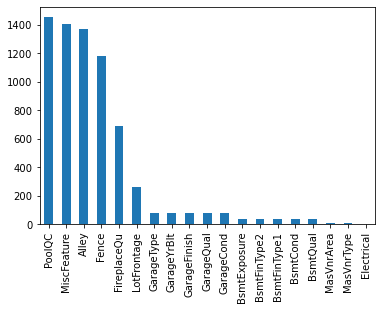

In [20]:
Missing_df.plot.bar()

Finding obvious reason for missing values and what should be their substitute?

PoolQC is missing because the house might not have a pool

In [21]:
df_train[df_train['PoolArea']>0]

# This is visible from the dataframe below as PoolQC has only 7 values and PoolArea has those same values greater than 0

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
197    198          75       RL        174.0    25419   Pave   NaN      Reg   
810    811          20       RL         78.0    10140   Pave   NaN      Reg   
1170  1171          80       RL         76.0     9880   Pave   NaN      Reg   
1182  1183          60       RL        160.0    15623   Pave   NaN      IR1   
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   
1386  1387          60       RL         80.0    16692   Pave   NaN      IR1   
1423  1424          80       RL          NaN    19690   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
197          Lvl    AllPub    Corner       Gtl        NAmes     Artery   
810          Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1170         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1182         Lvl    AllPub    Corner       Gtl      NoRidge       Norm   
1298         Bnk    AllPub    Corner       Gtl      Edwards      Feedr   
1386         Lvl    AllPub    Inside       Gtl       NWAmes       RRAn   
1423         Lvl    AllPub   CulDSac       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
197        Norm     1Fam     2Story            8            4       1918   
810        Norm     1Fam     1Story            6            6       1974   
1170       Norm     1Fam       SLvl            6            6       1977   
1182       Norm     1Fam     2Story           10            5       1996   
1298       Norm     1Fam     2Story           10            5       2008   
1386       Norm     1Fam     2Story            7            5       1978   
1423       Norm     1Fam       SLvl            6            7       1966   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
197           1990     Gable  CompShg      Stucco      Stucco       None   
810           1999       Hip  CompShg     HdBoard     HdBoard    BrkFace   
1170          1977     Gable  CompShg     Plywood     Plywood       None   
1182          1996       Hip  CompShg     Wd Sdng     ImStucc       None   
1298          2008       Hip  ClyTile      Stucco      Stucco      Stone   
1386          1978     Gable  CompShg     Plywood     Plywood    BrkFace   
1423          1966      Flat  Tar&Grv     Plywood     Plywood       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
197          0.0        Gd        Gd      PConc       TA       TA   
810         99.0        TA        TA     CBlock       TA       TA   
1170         0.0        TA        TA     CBlock       TA       TA   
1182         0.0        Gd        TA      PConc       Ex       TA   
1298       796.0        Ex        TA      PConc       Ex       TA   
1386       184.0        TA        TA     CBlock       Gd       TA   
1423         0.0        Gd        Gd     CBlock       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
197            No          GLQ        1036          LwQ         184   
810            No          ALQ         663          LwQ         377   
1170           Av          ALQ         522          Unf           0   
1182           Av          GLQ        2096          Unf           0   
1298           Gd          GLQ        5644          Unf           0   
1386           No          BLQ         790          LwQ         469   
1423           Av          Unf           0          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
197         140         1360    GasA        Gd          Y      SBrkr   
810           0         1040    GasA        Fa          Y      SBrkr   
1170        574         1096    GasA        TA          Y      SBrkr   
1182        300         2396    GasA        Ex          Y      SBrkr   
1298        466         6110    GasA        Ex          Y      SBrkr   
1386      

In [22]:
# Similarly we can say for other paramenters.

# It appears that entries need not be dropped in view of missing values and can be substituted

# For Qualitative parameters we will substiture the word 'Missing'
# For Quantitative parameters we will substitute 0

Missing_lst_Qualitative = []
Missing_lst_Quantitative = []

for feature in Missing_lst:
    if feature in Qualitative:
        Missing_lst_Qualitative.append(feature)
    else:
        Missing_lst_Quantitative.append(feature)
        
print(Missing_lst_Qualitative)
print(Missing_lst_Quantitative)

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType', 'Electrical']
['LotFrontage', 'GarageYrBlt', 'MasVnrArea']


In [23]:
for feature in Missing_lst_Qualitative:
    df_train[feature].fillna('MISSING',inplace = True)
for feature in Missing_lst_Quantitative:
    df_train[feature].fillna(0,inplace=True)
    
# Check if any column still has any missing value
df_train.isnull().sum()[df_train.isnull().sum()>0].sort_values(ascending = False)

Series([], dtype: int64)

### Encoding Categorical Variables to see corelations clearly

In [24]:
# Doing a sample to check the encoding procedure

# In general real-estate market Location is given huge preference. But the graph above doesn't show any obvious trend
# Trying to see if encoding will work on Neighborhood

In [25]:
SubCat_df = df_train[['Neighborhood','SalePrice']].groupby('Neighborhood').mean().sort_values(by='SalePrice')
SubCat_df ['Order'] = range(1,len(SubCat_df)+1)
SubCat_df

SalePrice  Order
Neighborhood                      
MeadowV        98576.470588      1
IDOTRR        100123.783784      2
BrDale        104493.750000      3
BrkSide       124834.051724      4
Edwards       128219.700000      5
OldTown       128225.300885      6
Sawyer        136793.135135      7
Blueste       137500.000000      8
SWISU         142591.360000      9
NPkVill       142694.444444     10
NAmes         145847.080000     11
Mitchel       156270.122449     12
SawyerW       186555.796610     13
NWAmes        189050.068493     14
Gilbert       192854.506329     15
Blmngtn       194870.882353     16
CollgCr       197965.773333     17
Crawfor       210624.725490     18
ClearCr       212565.428571     19
Somerst       225379.837209     20
Veenker       238772.727273     21
Timber        242247.447368     22
StoneBr       310499.000000     23
NridgHt       316270.623377     24
NoRidge       335295.317073     25

In [26]:
Neighborhood_encoded_dict = SubCat_df['Order'].to_dict()
Neighborhood_encoded_dict

{'MeadowV': 1,
 'IDOTRR': 2,
 'BrDale': 3,
 'BrkSide': 4,
 'Edwards': 5,
 'OldTown': 6,
 'Sawyer': 7,
 'Blueste': 8,
 'SWISU': 9,
 'NPkVill': 10,
 'NAmes': 11,
 'Mitchel': 12,
 'SawyerW': 13,
 'NWAmes': 14,
 'Gilbert': 15,
 'Blmngtn': 16,
 'CollgCr': 17,
 'Crawfor': 18,
 'ClearCr': 19,
 'Somerst': 20,
 'Veenker': 21,
 'Timber': 22,
 'StoneBr': 23,
 'NridgHt': 24,
 'NoRidge': 25}

In [27]:
encoded_neigborhood_df = df_train[['Neighborhood', 'SalePrice']]
for category,order in Neighborhood_encoded_dict.items():
    encoded_neigborhood_df.loc[encoded_neigborhood_df['Neighborhood'] == category, 'Neighborhood_Encoded'] = order
    
encoded_neigborhood_df

Neighborhood  SalePrice  Neighborhood_Encoded
0         CollgCr     208500                  17.0
1         Veenker     181500                  21.0
2         CollgCr     223500                  17.0
3         Crawfor     140000                  18.0
4         NoRidge     250000                  25.0
...           ...        ...                   ...
1455      Gilbert     175000                  15.0
1456       NWAmes     210000                  14.0
1457      Crawfor     266500                  18.0
1458        NAmes     142125                  11.0
1459      Edwards     147500                   5.0

[1460 rows x 3 columns]

In [28]:
#Let's now plot the encoded featrue
plt.xticks(rotation = 90)
sns.boxplot(x = 'Neighborhood_Encoded', y = 'SalePrice', data = encoded_neigborhood_df)

<AxesSubplot:xlabel='Neighborhood_Encoded', ylabel='SalePrice'>

In [29]:
# This is a phenomenal trend
# Let us encode all the Qualitative variables and see the trends

In [30]:
dictionary_of_order = {}
def encode(df,feature):
    temp_df = df[[feature,'SalePrice']].groupby(feature).mean().sort_values(by = 'SalePrice')
    if feature in Missing_lst:
        index_wo_MISSING = temp_df.index.drop('MISSING')
        temp_df = temp_df.reindex(['MISSING']+list(index_wo_MISSING))
        temp_df['order'] = range(0,temp_df.shape[0])
    else:
        index_of_nonmissing = temp_df.index
        temp_df = temp_df.reindex(['MISSING'] + list(index_of_nonmissing))
        temp_df['order'] = range(0,temp_df.shape[0])
    ordict = temp_df['order'].to_dict()
    dictionary_of_order[feature] = ordict
    

Qual_Encoded = []
for feature in Qualitative:
    encode(df_train,feature)
    Qual_Encoded.append(feature+'_Encoded')
print(Qual_Encoded)
print(dictionary_of_order)

['MSZoning_Encoded', 'Street_Encoded', 'Alley_Encoded', 'LotShape_Encoded', 'LandContour_Encoded', 'Utilities_Encoded', 'LotConfig_Encoded', 'LandSlope_Encoded', 'Neighborhood_Encoded', 'Condition1_Encoded', 'Condition2_Encoded', 'BldgType_Encoded', 'HouseStyle_Encoded', 'RoofStyle_Encoded', 'RoofMatl_Encoded', 'Exterior1st_Encoded', 'Exterior2nd_Encoded', 'MasVnrType_Encoded', 'ExterQual_Encoded', 'ExterCond_Encoded', 'Foundation_Encoded', 'BsmtQual_Encoded', 'BsmtCond_Encoded', 'BsmtExposure_Encoded', 'BsmtFinType1_Encoded', 'BsmtFinType2_Encoded', 'Heating_Encoded', 'HeatingQC_Encoded', 'CentralAir_Encoded', 'Electrical_Encoded', 'KitchenQual_Encoded', 'Functional_Encoded', 'FireplaceQu_Encoded', 'GarageType_Encoded', 'GarageFinish_Encoded', 'GarageQual_Encoded', 'GarageCond_Encoded', 'PavedDrive_Encoded', 'PoolQC_Encoded', 'Fence_Encoded', 'MiscFeature_Encoded', 'SaleType_Encoded', 'SaleCondition_Encoded']
{'MSZoning': {'MISSING': 0, 'C (all)': 1, 'RM': 2, 'RH': 3, 'RL': 4, 'FV': 5

In [31]:
for feature,ordict in dictionary_of_order.items():
    for category, order in ordict.items():
            df_train.loc[df_train[feature] == category, feature+'_Encoded'] = order

df_train.loc[:120]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0      1          60       RL         65.0     8450   Pave  MISSING      Reg   
1      2          20       RL         80.0     9600   Pave  MISSING      Reg   
2      3          60       RL         68.0    11250   Pave  MISSING      IR1   
3      4          70       RL         60.0     9550   Pave  MISSING      IR1   
4      5          60       RL         84.0    14260   Pave  MISSING      IR1   
5      6          50       RL         85.0    14115   Pave  MISSING      IR1   
6      7          20       RL         75.0    10084   Pave  MISSING      Reg   
7      8          60       RL          0.0    10382   Pave  MISSING      IR1   
8      9          50       RM         51.0     6120   Pave  MISSING      Reg   
9     10         190       RL         50.0     7420   Pave  MISSING      Reg   
10    11          20       RL         70.0    11200   Pave  MISSING      Reg   
11    12          60       RL         85.0    11924   Pave  MISSING      IR1   
12    13          20       RL          0.0    12968   Pave  MISSING      IR2   
13    14          20       RL         91.0    10652   Pave  MISSING      IR1   
14    15          20       RL          0.0    10920   Pave  MISSING      IR1   
15    16          45       RM         51.0     6120   Pave  MISSING      Reg   
16    17          20       RL          0.0    11241   Pave  MISSING      IR1   
17    18          90       RL         72.0    10791   Pave  MISSING      Reg   
18    19          20       RL         66.0    13695   Pave  MISSING      Reg   
19    20          20       RL         70.0     7560   Pave  MISSING      Reg   
20    21          60       RL        101.0    14215   Pave  MISSING      IR1   
21    22          45       RM         57.0     7449   Pave     Grvl      Reg   
22    23          20       RL         75.0     9742   Pave  MISSING      Reg   
23    24         120       RM         44.0     4224   Pave  MISSING      Reg   
24    25          20       RL          0.0     8246   Pave  MISSING      IR1   
25    26          20       RL        110.0    14230   Pave  MISSING      Reg   
26    27          20       RL         60.0     7200   Pave  MISSING      Reg   
27    28          20       RL         98.0    11478   Pave  MISSING      Reg   
28    29          20       RL         47.0    16321   Pave  MISSING      IR1   
29    30          30       RM         60.0     6324   Pave  MISSING      IR1   
30    31          70  C (all)         50.0     8500   Pave     Pave      Reg   
31    32          20       RL          0.0     8544   Pave  MISSING      IR1   
32    33          20       RL         85.0    11049   Pave  MISSING      Reg   
33    34          20       RL         70.0    10552   Pave  MISSING      IR1   
34    35         120       RL         60.0     7313   Pave  MISSING      Reg   
35    36          60       RL        108.0    13418   Pave  MISSING      Reg   
36    37          20       RL        112.0    10859   Pave  MISSING      Reg   
37    38          20       RL         74.0     8532   Pave  MISSING      Reg   
38    39          20       RL         68.0     7922   Pave  MISSING      Reg   
39    40          90       RL         65.0     6040   Pave  MISSING      Reg   
40    41          20       RL         84.0     8658   Pave  MISSING      Reg   
41    42          20       RL        115.0    16905   Pave  MISSING      Reg   
42    43          85       RL          0.0     9180   Pave  MISSING      IR1   
43    44          20       RL          0.0     9200   Pave  MISSING      IR1   
44    45          20       RL         70.0     7945   Pave  MISSING      Reg   
45    46         120       RL         61.0     7658   Pave  MISSING      Reg   
46    47          50       RL         48.0    12822   Pave  MISSING      IR1   
47    48          20       FV         84.0    11096   Pave  MISSING      Reg   
48    49         190       RM         33.0     4456   Pave  MISSING      Reg   
49    

We have Encoded all the categorical values

Let's see if we can find corelation in qualitative values now in the graphs

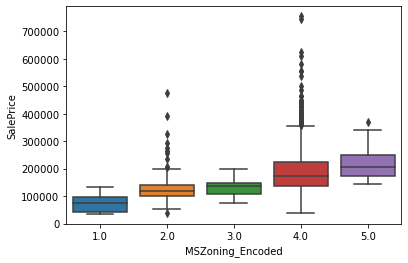

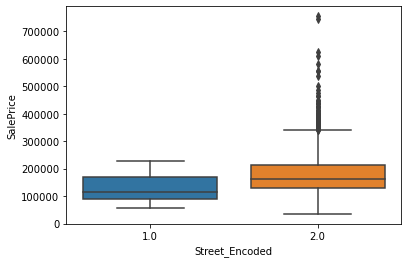

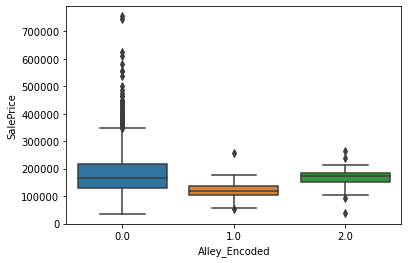

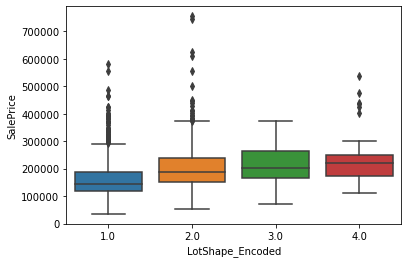

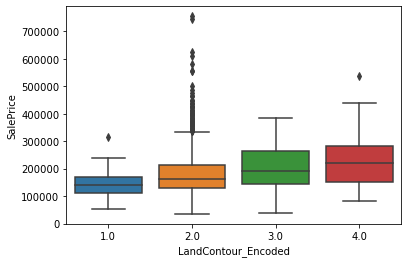

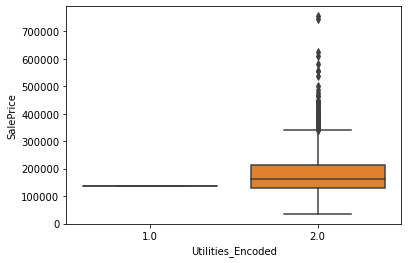

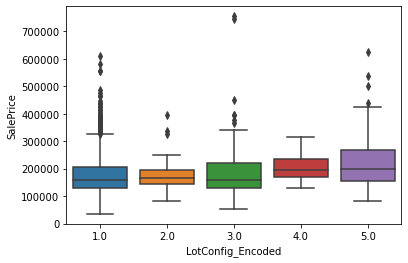

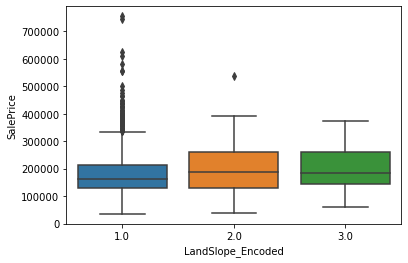

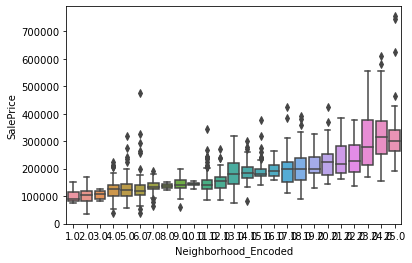

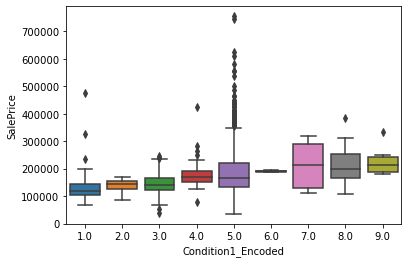

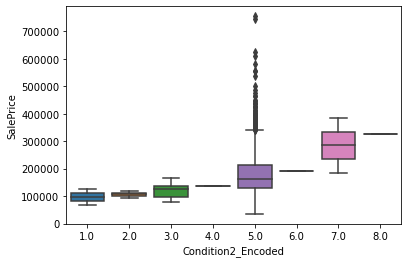

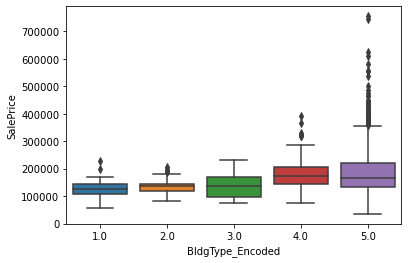

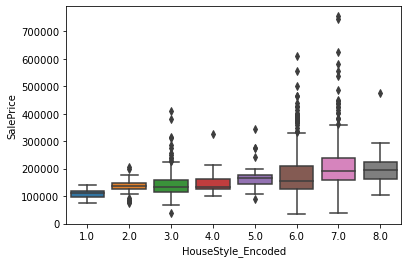

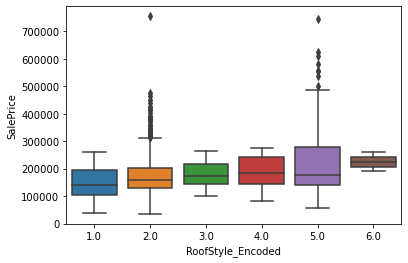

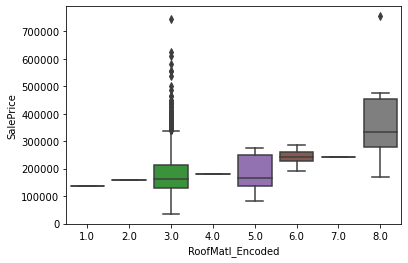

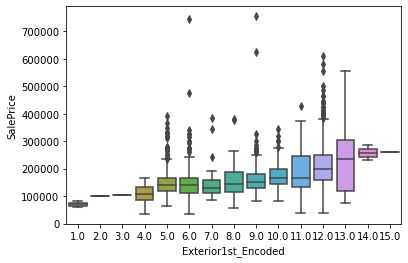

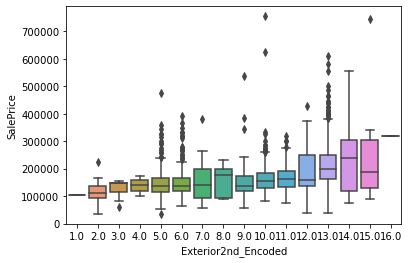

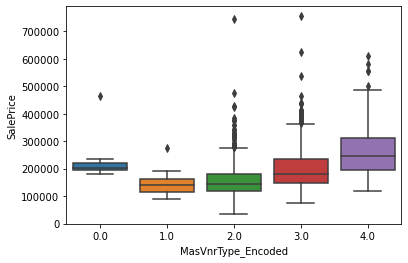

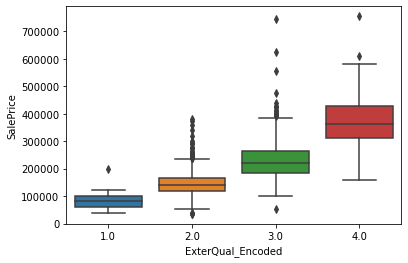

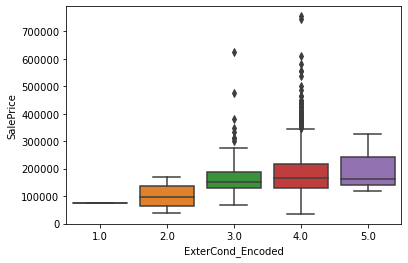

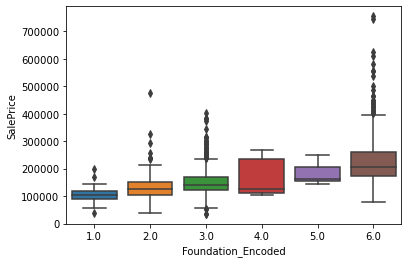

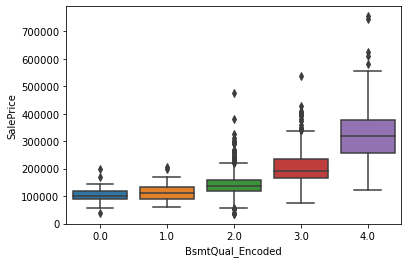

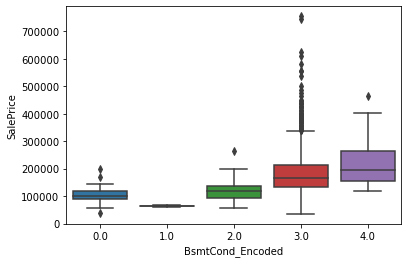

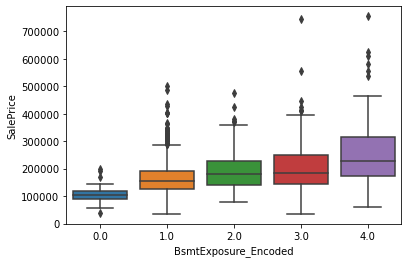

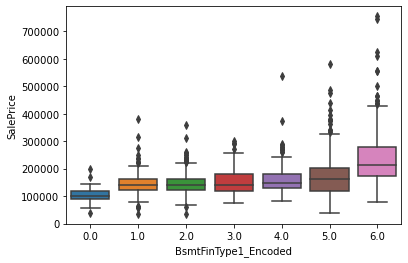

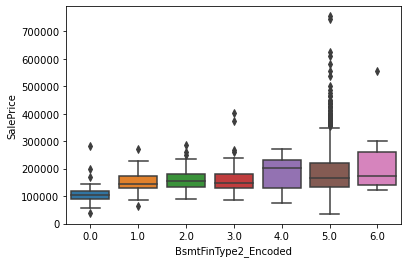

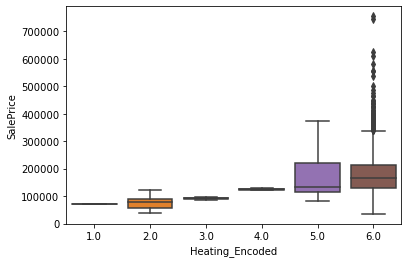

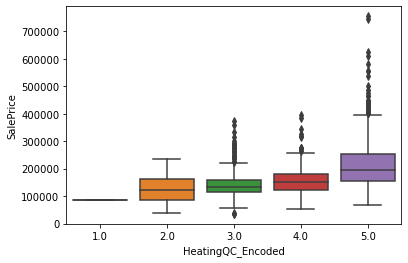

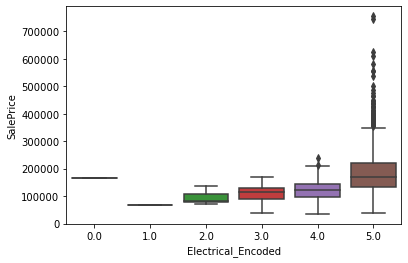

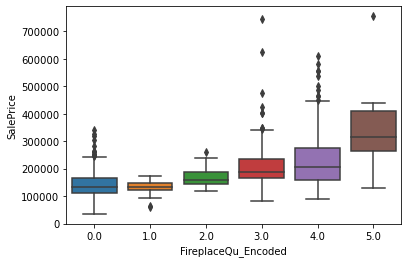

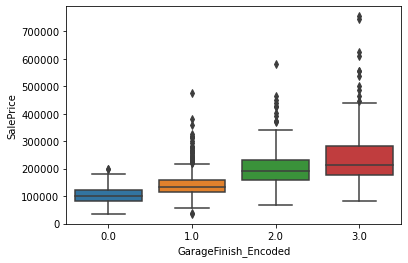

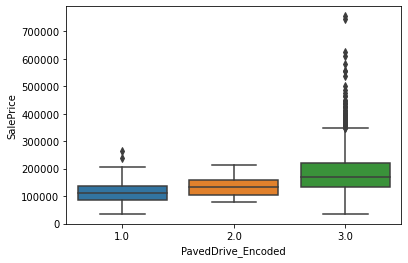

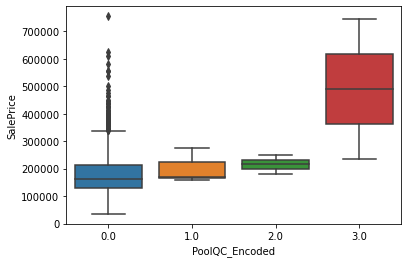

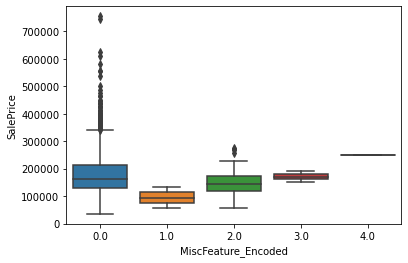

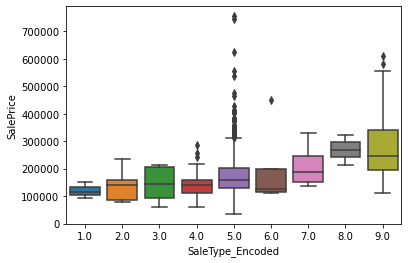

In [32]:
for feature in Qual_Encoded:
    plt.figure()
    sns.boxplot(x = feature, y='SalePrice', data=df_train)



In [33]:
# Some excelent corelation parameters can be seen from the graph

# Looking at the co-relation parameters 

<AxesSubplot:>

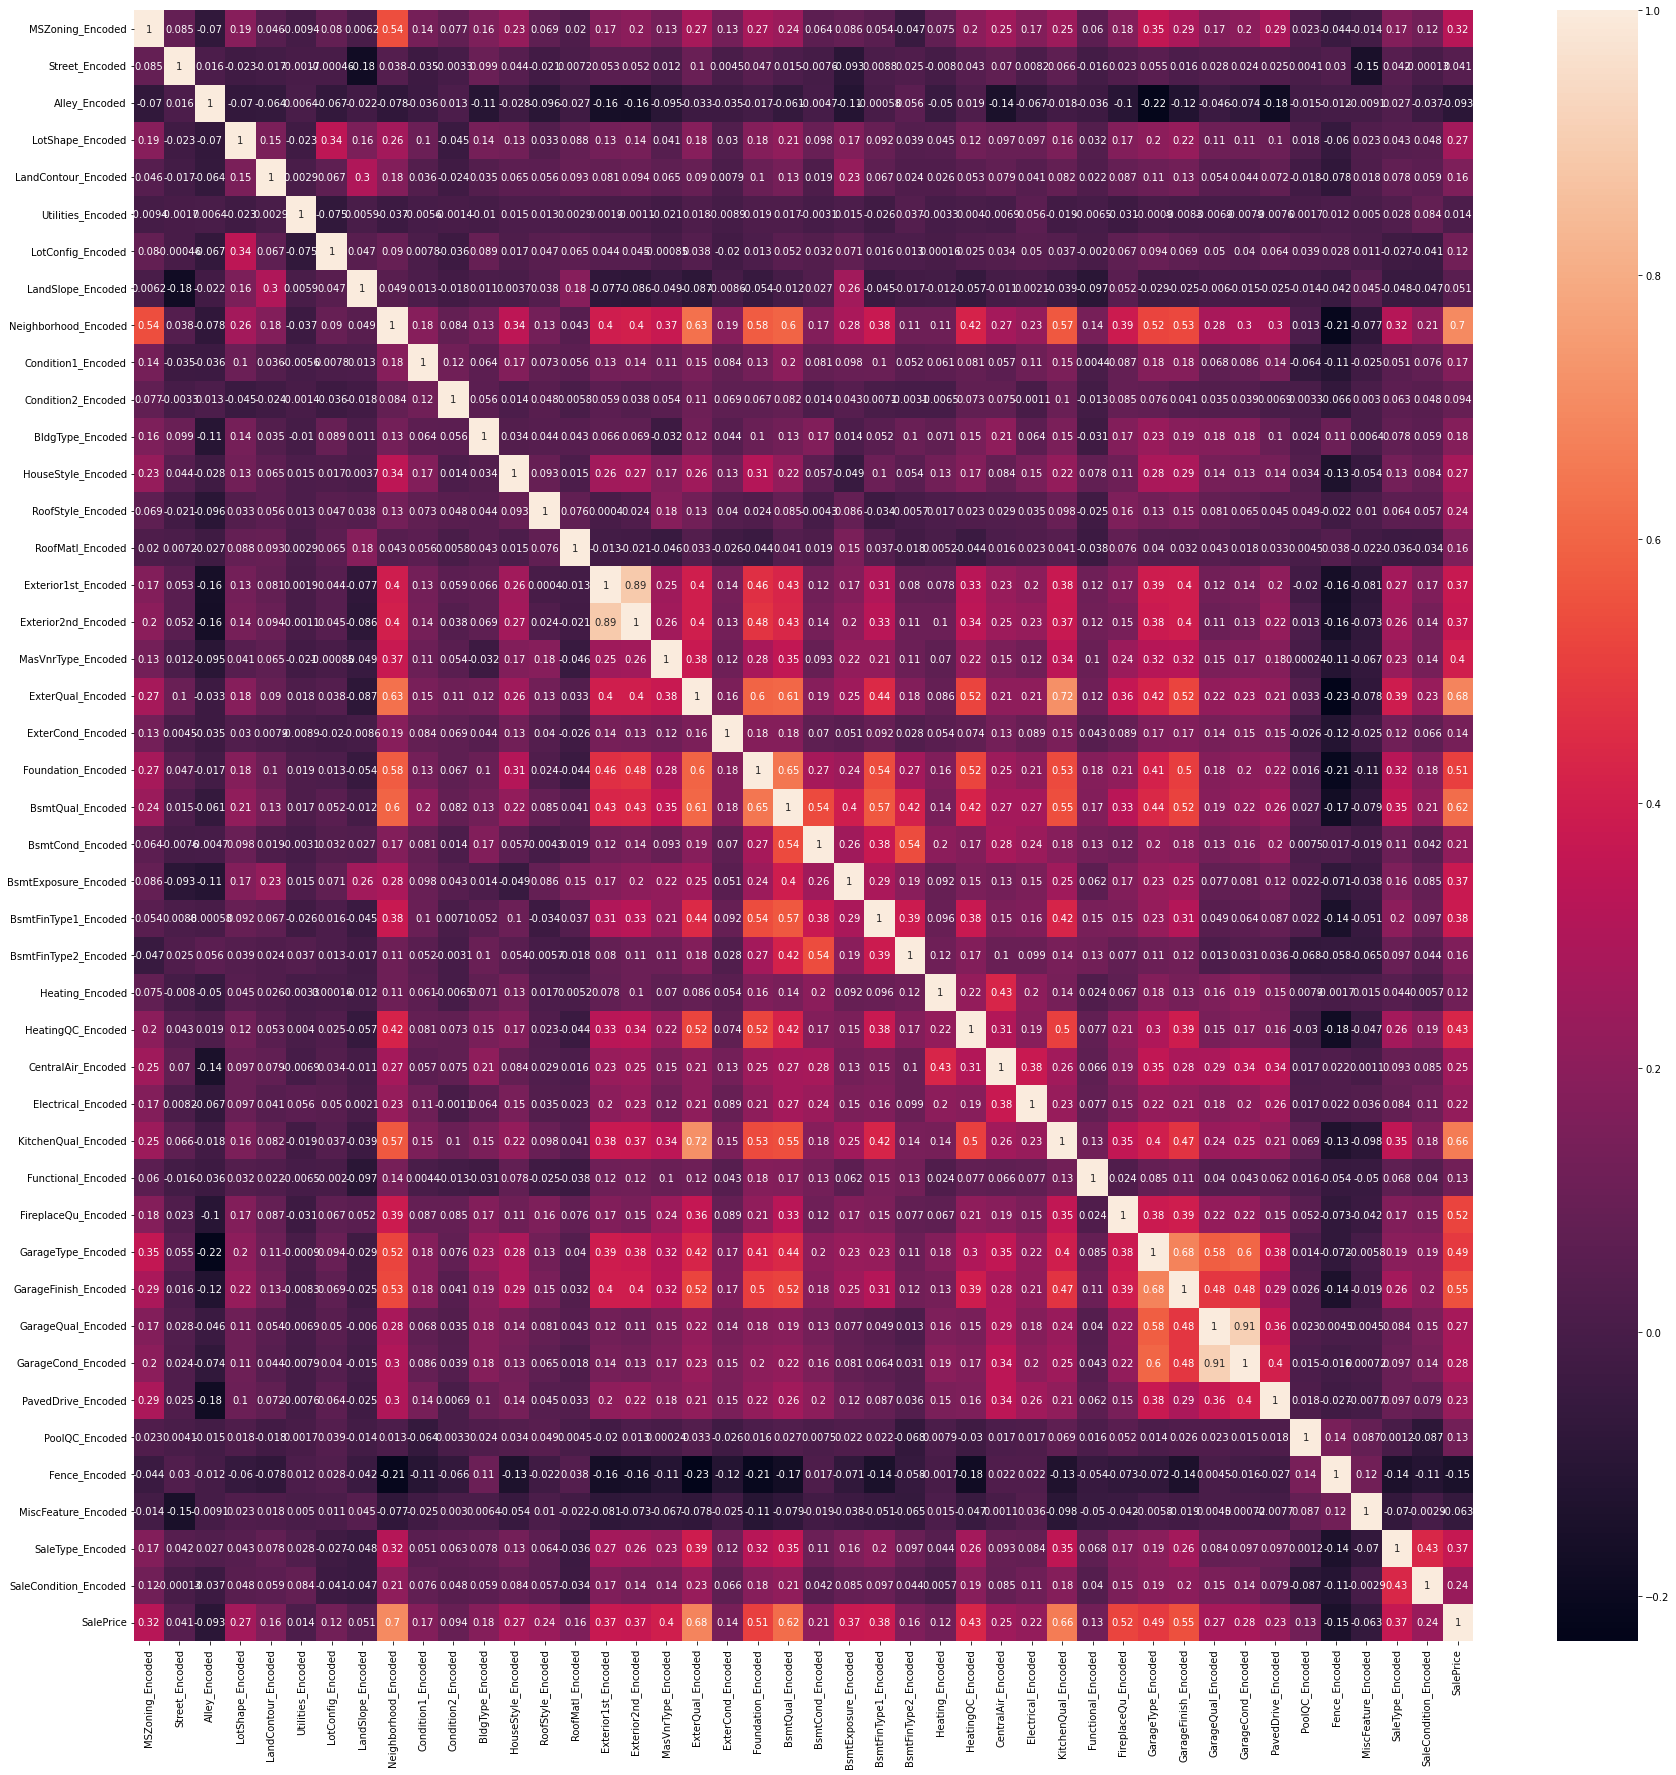

In [34]:
# lets plot a heat map first
correlation_matrix = df_train[Qual_Encoded+ ['SalePrice']].corr()
plt.figure(figsize=(30,30))
sns.heatmap(correlation_matrix,annot=True)

<AxesSubplot:>

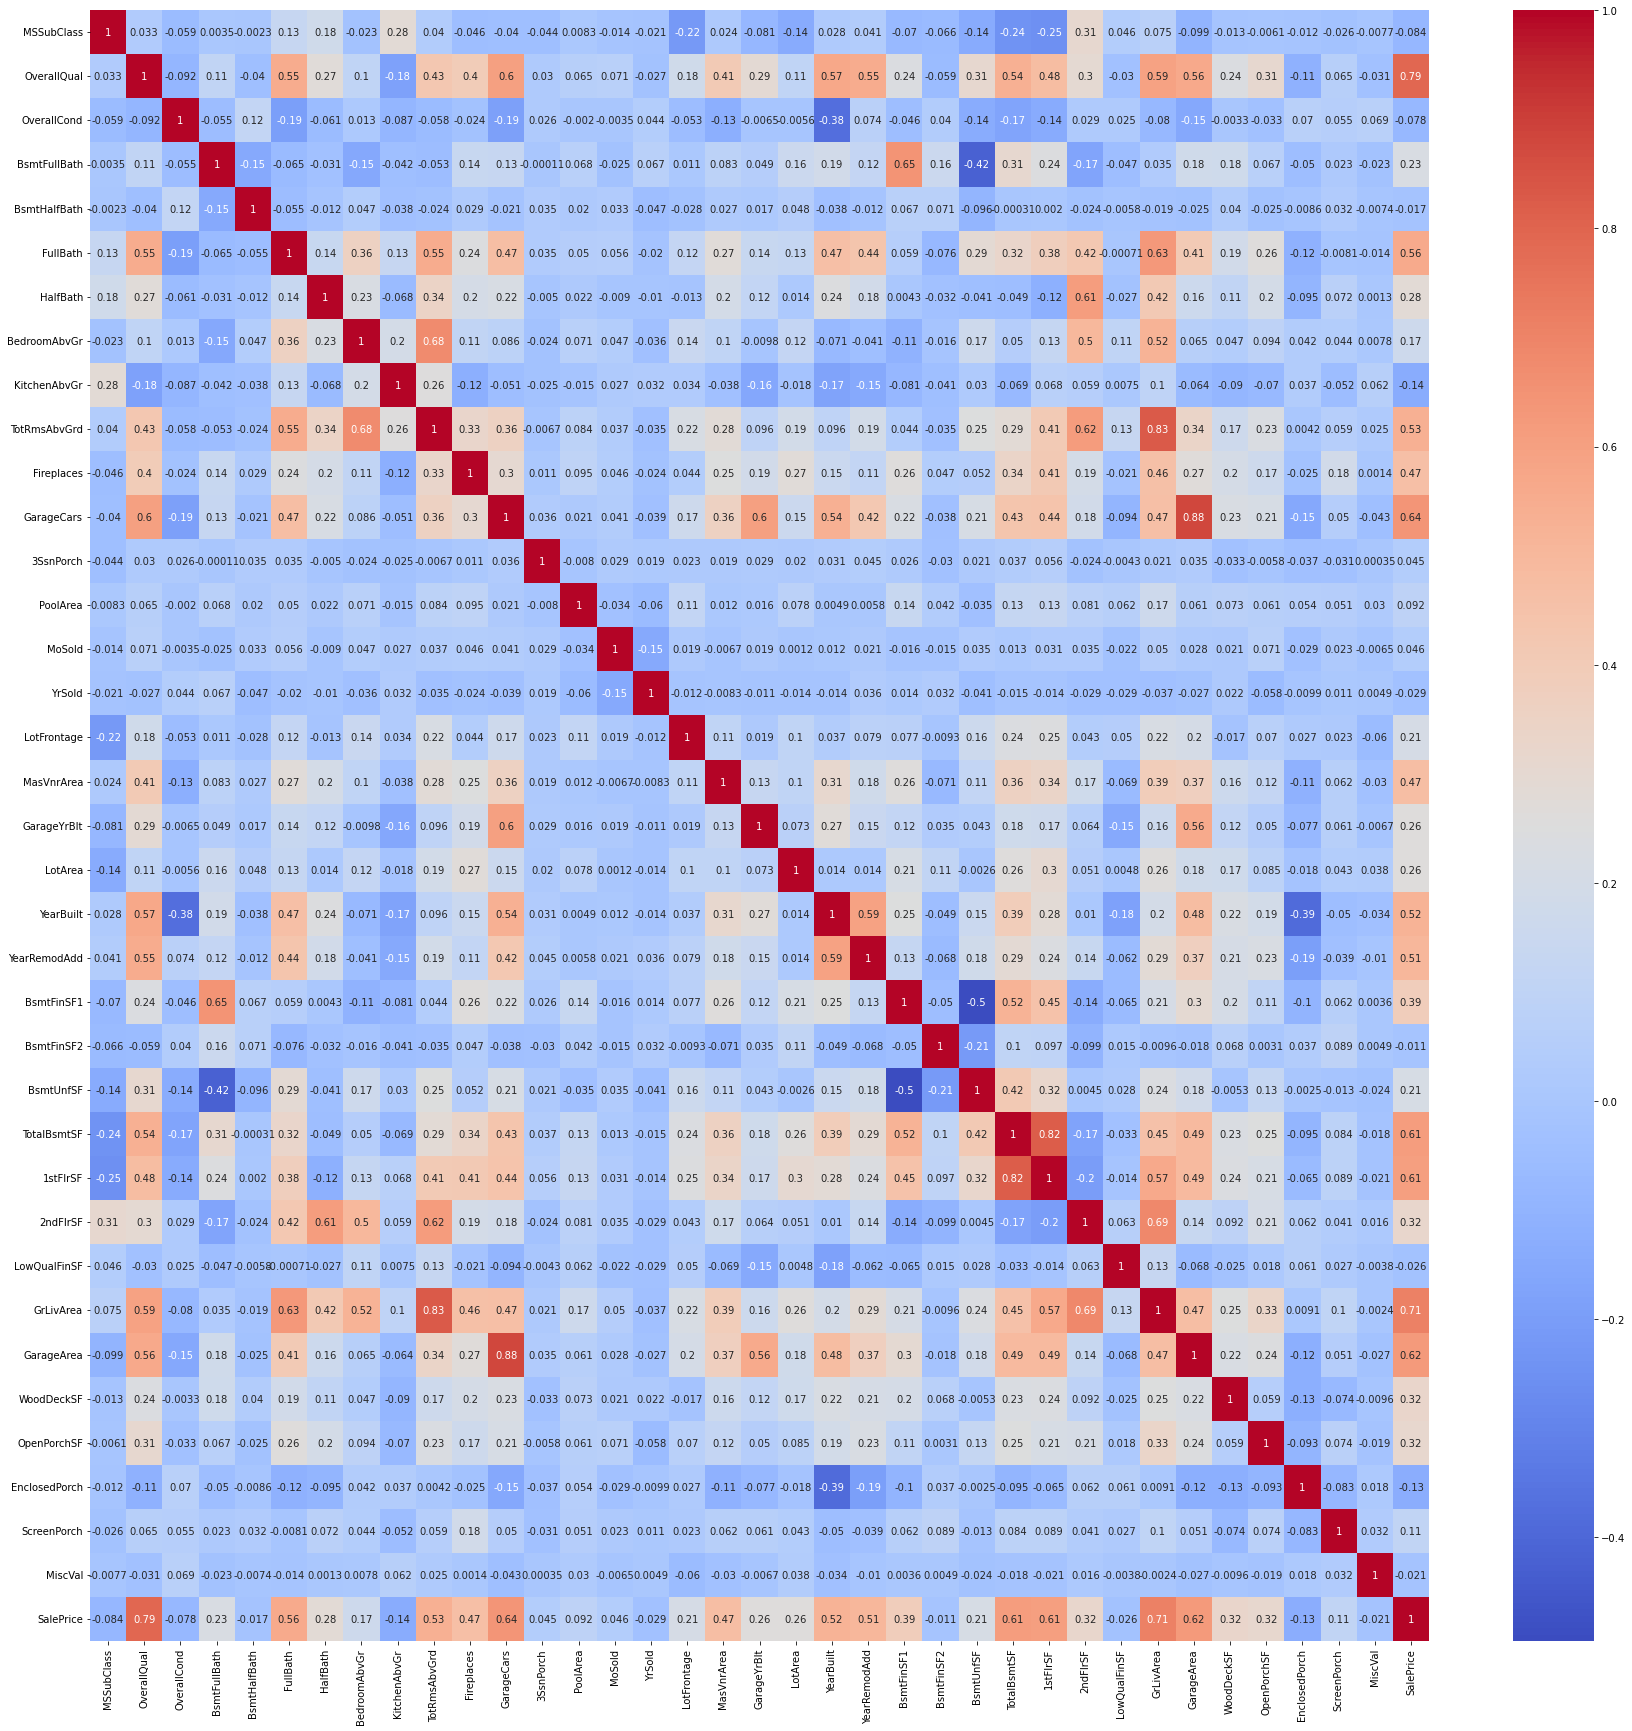

In [35]:
correlation_matrix = df_train[Quantitative+ ['SalePrice']].corr()
plt.figure(figsize=(30,30))
sns.heatmap(correlation_matrix,annot=True,cmap = 'coolwarm')

In [36]:
# We also need to see which qualitative parameters are dependent upon quantitative parameters

<AxesSubplot:>

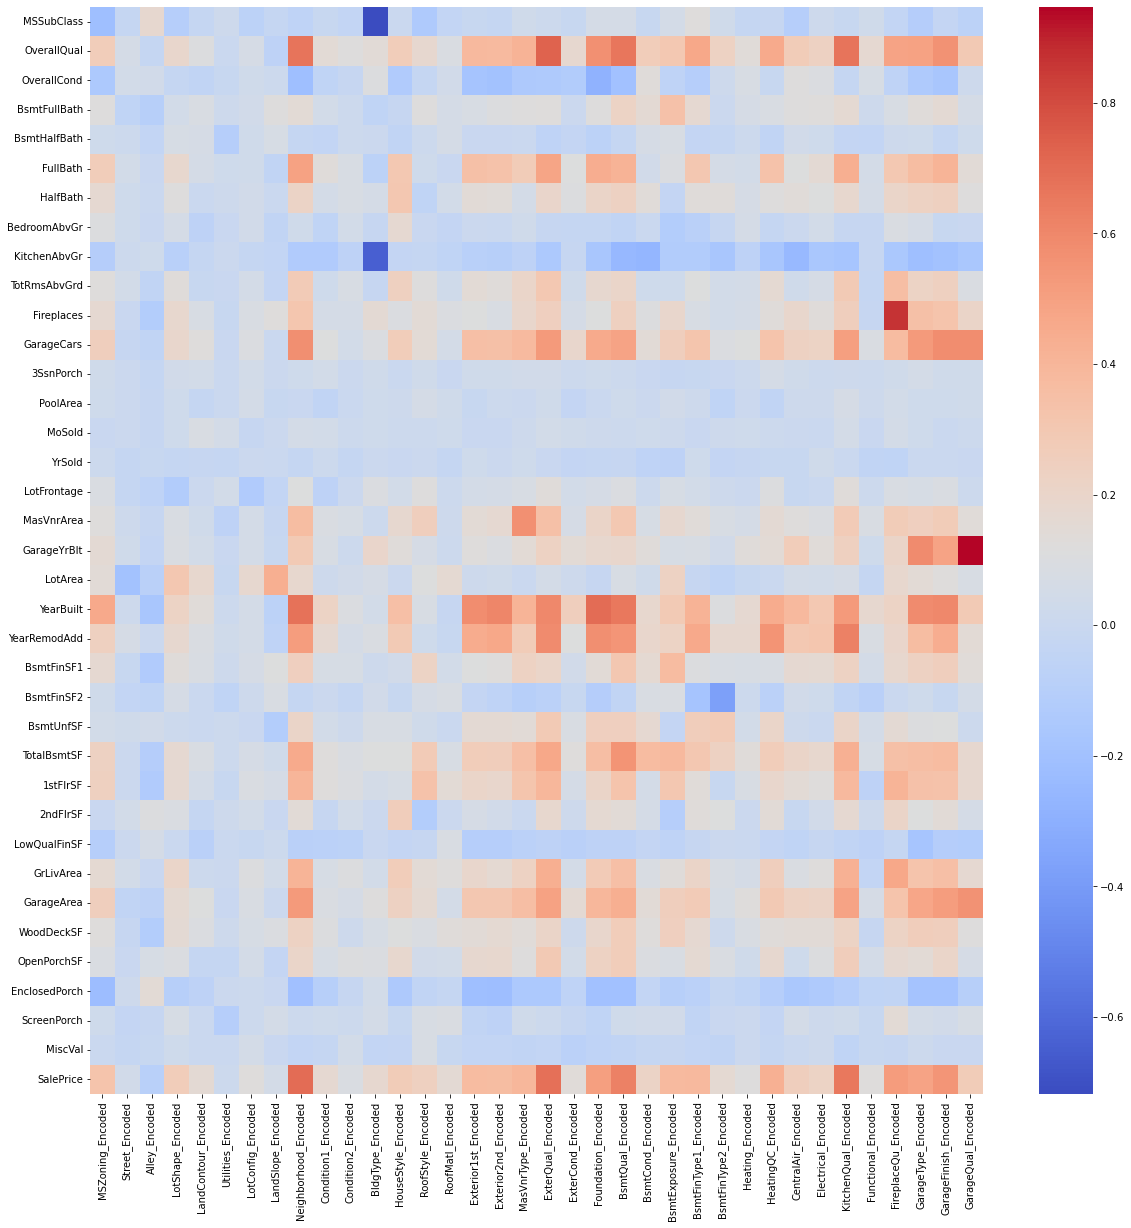

In [37]:
correlation_matrix = df_train[Qual_Encoded+Quantitative+['SalePrice']].corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix.iloc[len(Qual_Encoded):,:len(Quantitative)],cmap = 'coolwarm')

In [38]:
# plotting a combined corelation bar graph

<AxesSubplot:>

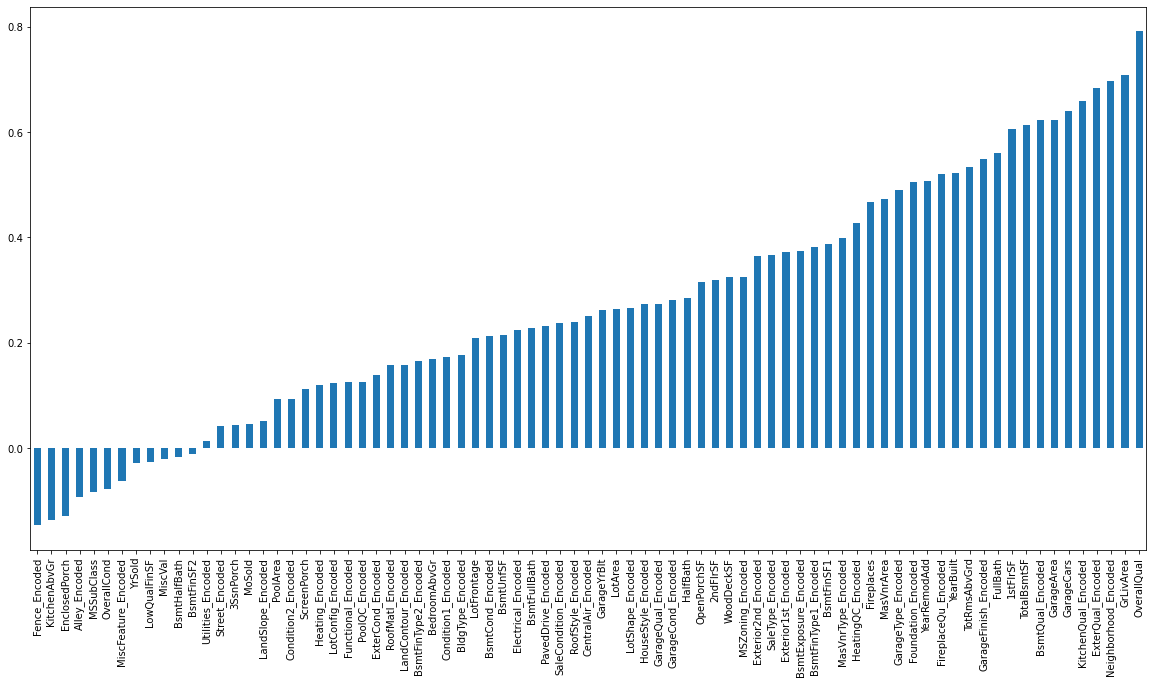

In [39]:
correlation_matrix = df_train[Qual_Encoded+Quantitative+['SalePrice']].corr()
plt.figure(figsize=(20,10))
correlation_matrix['SalePrice'][0:-1].sort_values().plot.bar()

In [40]:
Features_SortedBy_Corelation = correlation_matrix['SalePrice'][0:-1].sort_values(ascending=False).index
correlation_matrix['SalePrice'][0:-1].sort_values(ascending=False)

OverallQual              0.790982
GrLivArea                0.708624
Neighborhood_Encoded     0.696882
ExterQual_Encoded        0.682639
KitchenQual_Encoded      0.659600
GarageCars               0.640409
GarageArea               0.623431
BsmtQual_Encoded         0.622925
TotalBsmtSF              0.613581
1stFlrSF                 0.605852
FullBath                 0.560664
GarageFinish_Encoded     0.549247
TotRmsAbvGrd             0.533723
YearBuilt                0.522897
FireplaceQu_Encoded      0.520438
YearRemodAdd             0.507101
Foundation_Encoded       0.505503
GarageType_Encoded       0.489130
MasVnrArea               0.472614
Fireplaces               0.466929
HeatingQC_Encoded        0.427649
MasVnrType_Encoded       0.398096
BsmtFinSF1               0.386420
BsmtFinType1_Encoded     0.380964
BsmtExposure_Encoded     0.374696
Exterior1st_Encoded      0.371400
SaleType_Encoded         0.366821
Exterior2nd_Encoded      0.365384
MSZoning_Encoded         0.324610
WoodDeckSF    

# Random Forest Model

In [41]:
# Before we do any transformation Let's run a simple random forest model and see the error

In [42]:
Features_SortedBy_Corelation = list(Features_SortedBy_Corelation)
Features_SortedBy_Corelation

['OverallQual',
 'GrLivArea',
 'Neighborhood_Encoded',
 'ExterQual_Encoded',
 'KitchenQual_Encoded',
 'GarageCars',
 'GarageArea',
 'BsmtQual_Encoded',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'GarageFinish_Encoded',
 'TotRmsAbvGrd',
 'YearBuilt',
 'FireplaceQu_Encoded',
 'YearRemodAdd',
 'Foundation_Encoded',
 'GarageType_Encoded',
 'MasVnrArea',
 'Fireplaces',
 'HeatingQC_Encoded',
 'MasVnrType_Encoded',
 'BsmtFinSF1',
 'BsmtFinType1_Encoded',
 'BsmtExposure_Encoded',
 'Exterior1st_Encoded',
 'SaleType_Encoded',
 'Exterior2nd_Encoded',
 'MSZoning_Encoded',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF',
 'HalfBath',
 'GarageCond_Encoded',
 'GarageQual_Encoded',
 'HouseStyle_Encoded',
 'LotShape_Encoded',
 'LotArea',
 'GarageYrBlt',
 'CentralAir_Encoded',
 'RoofStyle_Encoded',
 'SaleCondition_Encoded',
 'PavedDrive_Encoded',
 'BsmtFullBath',
 'Electrical_Encoded',
 'BsmtUnfSF',
 'BsmtCond_Encoded',
 'LotFrontage',
 'BldgType_Encoded',
 'Condition1_Encoded',
 'BedroomAbvGr',
 'BsmtFinTyp

# Random Forest on the Data

In [43]:
# Import helpful libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Load the data, and separate the target
y = df_train.SalePrice
y.head()
# Create X (After completing the exercise, you can return to modify this line!)
features = Qual_Encoded + Quantitative

# Select columns corresponding to features, and preview the data
X = df_train[features]
X.head()

MSZoning_Encoded  Street_Encoded  Alley_Encoded  LotShape_Encoded  \
0               4.0             2.0            0.0               1.0   
1               4.0             2.0            0.0               1.0   
2               4.0             2.0            0.0               2.0   
3               4.0             2.0            0.0               2.0   
4               4.0             2.0            0.0               2.0   

   LandContour_Encoded  Utilities_Encoded  LotConfig_Encoded  \
0                  2.0                2.0                1.0   
1                  2.0                2.0                2.0   
2                  2.0                2.0                1.0   
3                  2.0                2.0                3.0   
4                  2.0                2.0                2.0   

   LandSlope_Encoded  Neighborhood_Encoded  Condition1_Encoded  \
0                1.0                  17.0                 5.0   
1                1.0                  21.0                 3.0   
2                1.0                  17.0                 5.0   
3                1.0                  18.0                 5.0   
4                1.0                  25.0                 5.0   

   Condition2_Encoded  BldgType_Encoded  HouseStyle_Encoded  \
0                 5.0               5.0                 7.0   
1                 5.0               5.0                 6.0   
2                 5.0               5.0                 7.0   
3                 5.0               5.0                 7.0   
4                 5.0               5.0                 7.0   

   RoofStyle_Encoded  RoofMatl_Encoded  Exterior1st_Encoded  \
0                2.0               3.0                 12.0   
1                2.0               3.0                  5.0   
2                2.0               3.0                 12.0   
3                2.0               3.0                  6.0   
4                2.0               3.0                 12.0   

   Exterior2nd_Encoded  MasVnrType_Encoded  ExterQual_Encoded  \
0                 13.0                 3.0                3.0   
1                  6.0                 2.0                2.0   
2                 13.0                 3.0                3.0   
3                  9.0                 2.0                2.0   
4                 13.0                 3.0                3.0   

   ExterCond_Encoded  Foundation_Encoded  BsmtQual_Encoded  BsmtCond_Encoded  \
0                4.0                 6.0               3.0               3.0   
1                4.0                 3.0               3.0               3.0   
2                4.0                 6.0               3.0               3.0   
3                4.0                 2.0               2.0               4.0   
4                4.0                 6.0               3.0               3.0   

   BsmtExposure_Encoded  BsmtFinType1_Encoded  BsmtFinType2_Encoded  \
0                   1.0                   6.0                   5.0   
1                   4.0                   4.0                   5.0   
2                   2.0                   6.0                   5.0   
3                   1.0                   4.0                   5.0   
4                   3.0                   6.0                   5.0   

   Heating_Encoded  HeatingQC_Encoded  CentralAir_Encoded  Electrical_Encoded  \
0              6.0                5.0                 2.0                 5.0   
1              6.0                5.0                 2.0                 5.0   
2              6.0                5.0                 2.0                 5.0   
3              6.0                4.0                 2.0                 5.0   
4              6.0                5.0                 2.0                 5.0   

   KitchenQual_Encoded  Functional_Encoded  FireplaceQu_Encoded  \
0                  3.0                 7.0                  0.0   
1                  2.0                 7.0                  3.0   
2                  3.0                 7.0 

In [44]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Define a random forest model
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

print("Validation MAE for Random Forest Model: {:,.6f}".format(rf_val_mae))

Validation MAE for Random Forest Model: 15,695.641589


In [45]:
# Error is too high. Let's reduce the number of features and then test our model

In [46]:
# Load the data, and separate the target
y = df_train.SalePrice
y.head()
# Create X (After completing the exercise, you can return to modify this line!)
features = Features_SortedBy_Corelation[0:16]

# Select columns corresponding to features, and preview the data
X = df_train[features]
X.head()

OverallQual  GrLivArea  Neighborhood_Encoded  ExterQual_Encoded  \
0            7       1710                  17.0                3.0   
1            6       1262                  21.0                2.0   
2            7       1786                  17.0                3.0   
3            7       1717                  18.0                2.0   
4            8       2198                  25.0                3.0   

   KitchenQual_Encoded  GarageCars  GarageArea  BsmtQual_Encoded  TotalBsmtSF  \
0                  3.0           2         548               3.0          856   
1                  2.0           2         460               3.0         1262   
2                  3.0           2         608               3.0          920   
3                  3.0           3         642               2.0          756   
4                  3.0           3         836               3.0         1145   

   1stFlrSF  FullBath  GarageFinish_Encoded  TotRmsAbvGrd  YearBuilt  \
0       856         2                   2.0             8       2003   
1      1262         2                   2.0             6       1976   
2       920         2                   2.0             6       2001   
3       961         1                   1.0             7       1915   
4      1145         2                   2.0             9       2000   

   FireplaceQu_Encoded  YearRemodAdd  
0                  0.0          2003  
1                  3.0          1976  
2                  3.0          2002  
3                  4.0          1970  
4                  3.0          2000

In [47]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Define a random forest model
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

print("Validation MAE for Random Forest Model: {:,.6f}".format(rf_val_mae))

Validation MAE for Random Forest Model: 17,615.043167


The Error has increased`and is still too much

## Analysing and transforming Features

<AxesSubplot:xlabel='LogSalePrice'>

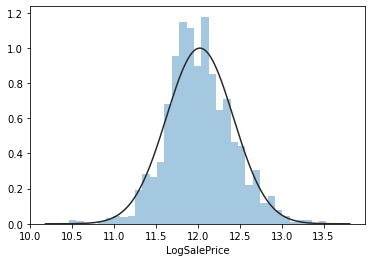

In [48]:
#let's first transform SalePrice i.e. Target variable
df_train['LogSalePrice'] = np.log1p(df_train['SalePrice'])
sns.distplot(df_train['LogSalePrice'],kde = False,fit = st.norm)

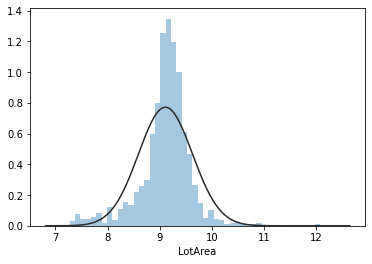

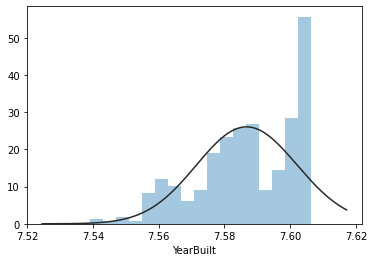

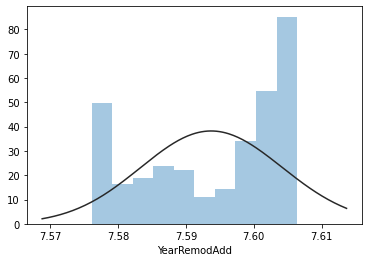

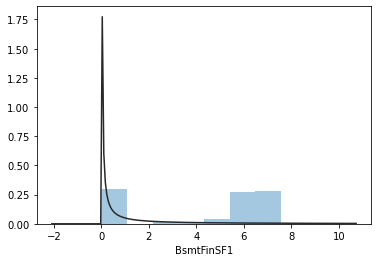

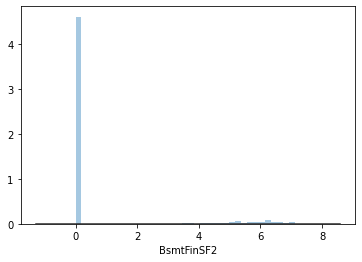

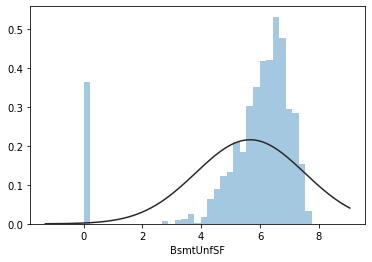

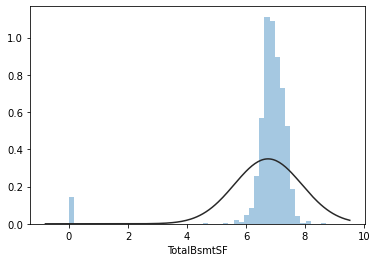

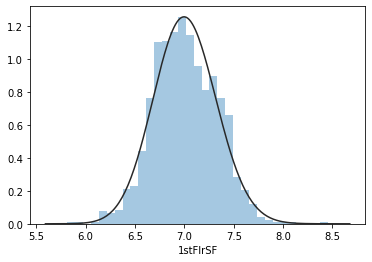

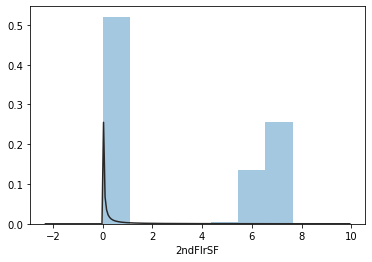

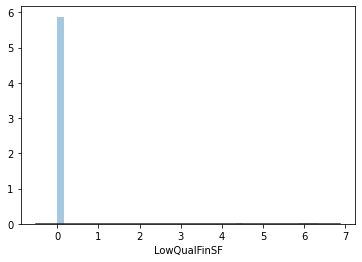

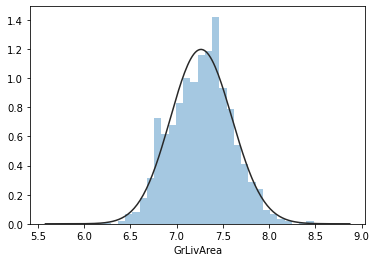

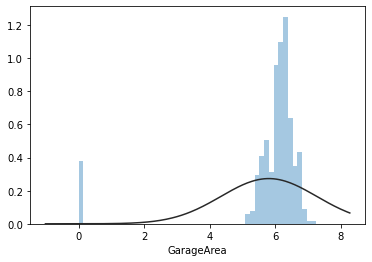

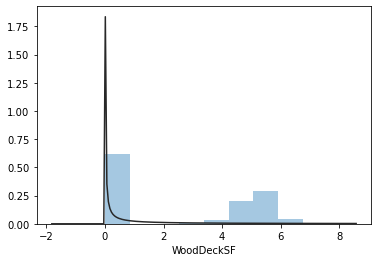

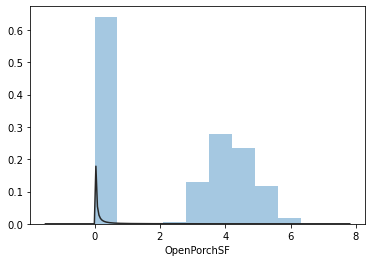

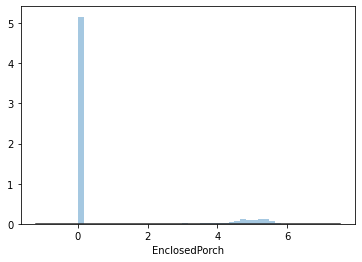

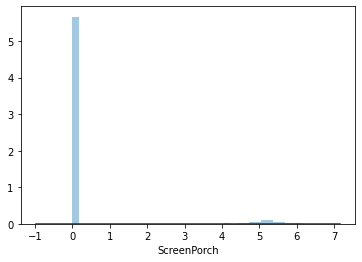

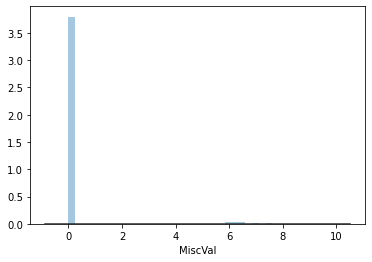

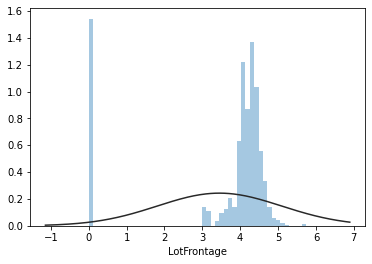

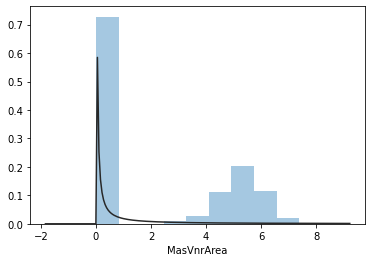

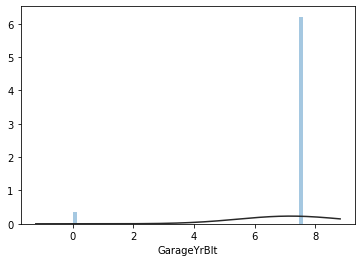

In [49]:
# A much better fit
# Let's see at other candidates that can go under log transform

for i in Integer_Quant+Float_Quant:
    plt.figure()
    sns.distplot(np.log1p(df_train[i]),kde = False, fit = st.lognorm)

In [50]:
Log_Transform_lst = '1stFlrSF GrLivArea LotArea'.split()
Log_Transformed_lst = []
for feature in Log_Transform_lst:
    df_train['Log'+feature] = np.log(df_train[feature])
    Log_Transformed_lst.append('Log'+feature)

In [51]:
df_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley  \
0        1          60       RL         65.0     8450   Pave  MISSING   
1        2          20       RL         80.0     9600   Pave  MISSING   
2        3          60       RL         68.0    11250   Pave  MISSING   
3        4          70       RL         60.0     9550   Pave  MISSING   
4        5          60       RL         84.0    14260   Pave  MISSING   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL         62.0     7917   Pave  MISSING   
1456  1457          20       RL         85.0    13175   Pave  MISSING   
1457  1458          70       RL         66.0     9042   Pave  MISSING   
1458  1459          20       RL         68.0     9717   Pave  MISSING   
1459  1460          20       RL         75.0     9937   Pave  MISSING   

     LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
0         Reg         Lvl    AllPub    Inside       Gtl      CollgCr   
1         Reg         Lvl    AllPub       FR2       Gtl      Veenker   
2         IR1         Lvl    AllPub    Inside       Gtl      CollgCr   
3         IR1         Lvl    AllPub    Corner       Gtl      Crawfor   
4         IR1         Lvl    AllPub       FR2       Gtl      NoRidge   
...       ...         ...       ...       ...       ...          ...   
1455      Reg         Lvl    AllPub    Inside       Gtl      Gilbert   
1456      Reg         Lvl    AllPub    Inside       Gtl       NWAmes   
1457      Reg         Lvl    AllPub    Inside       Gtl      Crawfor   
1458      Reg         Lvl    AllPub    Inside       Gtl        NAmes   
1459      Reg         Lvl    AllPub    Inside       Gtl      Edwards   

     Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
0          Norm       Norm     1Fam     2Story            7            5   
1         Feedr       Norm     1Fam     1Story            6            8   
2          Norm       Norm     1Fam     2Story            7            5   
3          Norm       Norm     1Fam     2Story            7            5   
4          Norm       Norm     1Fam     2Story            8            5   
...         ...        ...      ...        ...          ...          ...   
1455       Norm       Norm     1Fam     2Story            6            5   
1456       Norm       Norm     1Fam     1Story            6            6   
1457       Norm       Norm     1Fam     2Story            7            9   
1458       Norm       Norm     1Fam     1Story            5            6   
1459       Norm       Norm     1Fam     1Story            5            6   

      YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0          2003          2003     Gable  CompShg     VinylSd     VinylSd   
1          1976          1976     Gable  CompShg     MetalSd     MetalSd   
2          2001          2002     Gable  CompShg     VinylSd     VinylSd   
3          1915          1970     Gable  CompShg     Wd Sdng     Wd Shng   
4          2000          2000     Gable  CompShg     VinylSd     VinylSd   
...         ...           ...       ...      ...         ...         ...   
1455       1999          2000     Gable  CompShg     VinylSd     VinylSd   
1456       1978          1988     Gable  CompShg     Plywood     Plywood   
1457       1941          2006     Gable  CompShg     CemntBd     CmentBd   
1458       1950          1996       Hip  CompShg     MetalSd     MetalSd   
1459       1965          1965     Gable  CompShg     HdBoard     HdBoard   

     MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0       BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1          None         0.0        TA        TA     CBlock       Gd       TA   
2       BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3          None         0.0        TA        TA     BrkTil       TA       Gd   
4       BrkFace       350.0        Gd   

In [52]:
# Seeing the co-relation parameters yet again
correlation_matrix = df_train[Qual_Encoded+Quantitative+Log_Transformed_lst+['SalePrice']+['LogSalePrice']].corr()
#plt.figure(figsize=(20,10))
#correlation_matrix['SalePrice'][0:-1].sort_values().plot.bar()
correlation_matrix['LogSalePrice'].sort_values(ascending=False)

LogSalePrice             1.000000
SalePrice                0.948374
OverallQual              0.817185
Neighborhood_Encoded     0.741155
LogGrLivArea             0.730255
GrLivArea                0.700927
GarageCars               0.680625
ExterQual_Encoded        0.678840
KitchenQual_Encoded      0.667893
GarageArea               0.650888
BsmtQual_Encoded         0.647718
TotalBsmtSF              0.612134
Log1stFlrSF              0.608947
GarageFinish_Encoded     0.604878
1stFlrSF                 0.596981
FullBath                 0.594771
YearBuilt                0.586570
GarageType_Encoded       0.575627
YearRemodAdd             0.565608
Foundation_Encoded       0.550411
FireplaceQu_Encoded      0.546362
TotRmsAbvGrd             0.534422
Fireplaces               0.489450
HeatingQC_Encoded        0.473762
MasVnrArea               0.426776
MSZoning_Encoded         0.410574
Exterior1st_Encoded      0.405643
MasVnrType_Encoded       0.403635
LogLotArea               0.399918
BsmtFinType1_E

# Running Random forest with transformed variables

In [53]:
# Load the data, and separate the target
y = df_train.LogSalePrice
y.head()
# Create X (After completing the exercise, you can return to modify this line!)
features = Qual_Encoded + Quantitative + Log_Transformed_lst

# Select columns corresponding to features, and preview the data
X = df_train[features]
X.head()

MSZoning_Encoded  Street_Encoded  Alley_Encoded  LotShape_Encoded  \
0               4.0             2.0            0.0               1.0   
1               4.0             2.0            0.0               1.0   
2               4.0             2.0            0.0               2.0   
3               4.0             2.0            0.0               2.0   
4               4.0             2.0            0.0               2.0   

   LandContour_Encoded  Utilities_Encoded  LotConfig_Encoded  \
0                  2.0                2.0                1.0   
1                  2.0                2.0                2.0   
2                  2.0                2.0                1.0   
3                  2.0                2.0                3.0   
4                  2.0                2.0                2.0   

   LandSlope_Encoded  Neighborhood_Encoded  Condition1_Encoded  \
0                1.0                  17.0                 5.0   
1                1.0                  21.0                 3.0   
2                1.0                  17.0                 5.0   
3                1.0                  18.0                 5.0   
4                1.0                  25.0                 5.0   

   Condition2_Encoded  BldgType_Encoded  HouseStyle_Encoded  \
0                 5.0               5.0                 7.0   
1                 5.0               5.0                 6.0   
2                 5.0               5.0                 7.0   
3                 5.0               5.0                 7.0   
4                 5.0               5.0                 7.0   

   RoofStyle_Encoded  RoofMatl_Encoded  Exterior1st_Encoded  \
0                2.0               3.0                 12.0   
1                2.0               3.0                  5.0   
2                2.0               3.0                 12.0   
3                2.0               3.0                  6.0   
4                2.0               3.0                 12.0   

   Exterior2nd_Encoded  MasVnrType_Encoded  ExterQual_Encoded  \
0                 13.0                 3.0                3.0   
1                  6.0                 2.0                2.0   
2                 13.0                 3.0                3.0   
3                  9.0                 2.0                2.0   
4                 13.0                 3.0                3.0   

   ExterCond_Encoded  Foundation_Encoded  BsmtQual_Encoded  BsmtCond_Encoded  \
0                4.0                 6.0               3.0               3.0   
1                4.0                 3.0               3.0               3.0   
2                4.0                 6.0               3.0               3.0   
3                4.0                 2.0               2.0               4.0   
4                4.0                 6.0               3.0               3.0   

   BsmtExposure_Encoded  BsmtFinType1_Encoded  BsmtFinType2_Encoded  \
0                   1.0                   6.0                   5.0   
1                   4.0                   4.0                   5.0   
2                   2.0                   6.0                   5.0   
3                   1.0                   4.0                   5.0   
4                   3.0                   6.0                   5.0   

   Heating_Encoded  HeatingQC_Encoded  CentralAir_Encoded  Electrical_Encoded  \
0              6.0                5.0                 2.0                 5.0   
1              6.0                5.0                 2.0                 5.0   
2              6.0                5.0                 2.0                 5.0   
3              6.0                4.0                 2.0                 5.0   
4              6.0                5.0                 2.0                 5.0   

   KitchenQual_Encoded  Functional_Encoded  FireplaceQu_Encoded  \
0                  3.0                 7.0                  0.0   
1                  2.0                 7.0                  3.0   
2                  3.0                 7.0 

In [54]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Define a random forest model
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(np.exp(rf_val_predictions), np.exp(val_y))

print("Validation MAE for Random Forest Model: {:,.6f}".format(rf_val_mae))

Validation MAE for Random Forest Model: 15,967.987719


### Significant Reduction in error!!!

Validation MAE for Random Forest Model: 0.091190

### Including Quadratric terms for top 7 corelations

In [55]:
Quad_Transform_lst = 'OverallQual Neighborhood_Encoded GrLivArea GarageCars TotalBsmtSF KitchenQual_Encoded'.split()
Quad_Transformed_lst = []
for feature in Quad_Transform_lst:
    df_train['Quad'+feature] = df_train[feature]**2
    Quad_Transformed_lst.append('Quad'+feature)

In [56]:
# Load the data, and separate the target
y = df_train.LogSalePrice
y.head()
# Create X (After completing the exercise, you can return to modify this line!)
features = Qual_Encoded + Quantitative + Log_Transformed_lst + Quad_Transformed_lst

# Select columns corresponding to features, and preview the data
X = df_train[features]
X.head()

MSZoning_Encoded  Street_Encoded  Alley_Encoded  LotShape_Encoded  \
0               4.0             2.0            0.0               1.0   
1               4.0             2.0            0.0               1.0   
2               4.0             2.0            0.0               2.0   
3               4.0             2.0            0.0               2.0   
4               4.0             2.0            0.0               2.0   

   LandContour_Encoded  Utilities_Encoded  LotConfig_Encoded  \
0                  2.0                2.0                1.0   
1                  2.0                2.0                2.0   
2                  2.0                2.0                1.0   
3                  2.0                2.0                3.0   
4                  2.0                2.0                2.0   

   LandSlope_Encoded  Neighborhood_Encoded  Condition1_Encoded  \
0                1.0                  17.0                 5.0   
1                1.0                  21.0                 3.0   
2                1.0                  17.0                 5.0   
3                1.0                  18.0                 5.0   
4                1.0                  25.0                 5.0   

   Condition2_Encoded  BldgType_Encoded  HouseStyle_Encoded  \
0                 5.0               5.0                 7.0   
1                 5.0               5.0                 6.0   
2                 5.0               5.0                 7.0   
3                 5.0               5.0                 7.0   
4                 5.0               5.0                 7.0   

   RoofStyle_Encoded  RoofMatl_Encoded  Exterior1st_Encoded  \
0                2.0               3.0                 12.0   
1                2.0               3.0                  5.0   
2                2.0               3.0                 12.0   
3                2.0               3.0                  6.0   
4                2.0               3.0                 12.0   

   Exterior2nd_Encoded  MasVnrType_Encoded  ExterQual_Encoded  \
0                 13.0                 3.0                3.0   
1                  6.0                 2.0                2.0   
2                 13.0                 3.0                3.0   
3                  9.0                 2.0                2.0   
4                 13.0                 3.0                3.0   

   ExterCond_Encoded  Foundation_Encoded  BsmtQual_Encoded  BsmtCond_Encoded  \
0                4.0                 6.0               3.0               3.0   
1                4.0                 3.0               3.0               3.0   
2                4.0                 6.0               3.0               3.0   
3                4.0                 2.0               2.0               4.0   
4                4.0                 6.0               3.0               3.0   

   BsmtExposure_Encoded  BsmtFinType1_Encoded  BsmtFinType2_Encoded  \
0                   1.0                   6.0                   5.0   
1                   4.0                   4.0                   5.0   
2                   2.0                   6.0                   5.0   
3                   1.0                   4.0                   5.0   
4                   3.0                   6.0                   5.0   

   Heating_Encoded  HeatingQC_Encoded  CentralAir_Encoded  Electrical_Encoded  \
0              6.0                5.0                 2.0                 5.0   
1              6.0                5.0                 2.0                 5.0   
2              6.0                5.0                 2.0                 5.0   
3              6.0                4.0                 2.0                 5.0   
4              6.0                5.0                 2.0                 5.0   

   KitchenQual_Encoded  Functional_Encoded  FireplaceQu_Encoded  \
0                  3.0                 7.0                  0.0   
1                  2.0                 7.0                  3.0   
2                  3.0                 7.0 

In [84]:
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state=1)

# Define a random forest model
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(np.exp(rf_val_predictions), np.exp(val_y))

print("Validation MAE for Random Forest Model: {:,.6f}".format(rf_val_mae))

# Quadratric transformations dont result in anything

Validation MAE for Random Forest Model: 15,983.459183


## Let's do a lasso linear model

In [88]:
import sklearn.linear_model as linear_model

features =  Quantitative + Log_Transformed_lst + Quad_Transformed_lst + Qual_Encoded 
lasso = linear_model.LassoLarsCV(max_iter=10000)
X = df_train[features].values
y = df_train['LogSalePrice'].values
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state=1)
lasso.fit(train_X, train_y)

Ypred = (lasso.predict(val_X))

In [89]:
def error(actual, predicted):
    actual = np.log(actual)
    predicted = np.log(predicted)
    return np.sqrt(np.sum(np.square(actual-predicted))/len(actual))
error(val_y, Ypred)

0.01072659313590951

In [60]:
mean_absolute_error(np.exp(Ypred), np.exp(val_y))

15155.207521724089

In [61]:
# This model is working better

In [90]:
# Let's Apply it to test data
df_test = pd.read_csv('test.csv')
Missing_df = df_test.isnull().sum()[df_test.isnull().sum()>0].sort_values(ascending = False)
Missing_lst = Missing_df.index
Missing_df

for feature in Qualitative :
    df_test[feature].fillna('MISSING',inplace=True)
for feature in Quantitative:
    df_test[feature].fillna(0,inplace=True)

for feature,ordict in dictionary_of_order.items():
    for category, order in ordict.items():
            df_test.loc[df_test[feature] == category, feature+'_Encoded'] = order

Log_Transform_lst = '1stFlrSF GrLivArea LotArea'.split()
Log_Transformed_lst = []
for feature in Log_Transform_lst:
    df_test['Log'+feature] = np.log(df_test[feature])
    Log_Transformed_lst.append('Log'+feature)

Quad_Transform_lst = 'OverallQual Neighborhood_Encoded GrLivArea GarageCars TotalBsmtSF KitchenQual_Encoded'.split()
Quad_Transformed_lst = []
for feature in Quad_Transform_lst:
    df_test['Quad'+feature] = df_test[feature]**2
    Quad_Transformed_lst.append('Quad'+feature)

features = Qual_Encoded + Quantitative + Log_Transformed_lst + Quad_Transformed_lst
lasso = linear_model.LassoLarsCV(max_iter=10000)
X = df_train[features].values
y = df_train['LogSalePrice'].values
lasso.fit(X, y)
            


LassoLarsCV(max_iter=10000)

In [91]:
#np.isfinite(df_test[features]).sum().sort_values()
Ypred = (lasso.predict(df_test[features]))

np.exp(Ypred)

array([113624.71191038, 165332.91397937, 179022.44296725, ...,
       168326.71549934, 117957.09105218, 228466.60900645])

In [95]:
Saleprice = pd.DataFrame({'Id': range(1461, 2920) , 'SalePrice' : np.exp(Ypred)})
Saleprice

Id      SalePrice
0     1461  113624.711910
1     1462  165332.913979
2     1463  179022.442967
3     1464  197302.455702
4     1465  202590.151029
...    ...            ...
1454  2915   90264.828351
1455  2916   83559.272718
1456  2917  168326.715499
1457  2918  117957.091052
1458  2919  228466.609006

[1459 rows x 2 columns]

In [94]:
Saleprice.to_csv('Newsaleprice1.csv',index = False)